Работу выполнила Алина Мусина

### LDA

### Содержание

- [Введение. Анализ таблицы.](#ch1)
- [Анализ таблицы 1](#ch2)
- [Анализ таблицы 2](#ch3)
- [Анализ таблицы 3](#ch4)
- [Анализ таблицы 4](#ch5)
- [Анализ таблицы 5](#ch6)
- [Анализ таблицы 6](#ch7)
- [Вывод](#ch9)

### Введение. Анализ таблицы <a class="anchor" id="ch1"></a>

Какая наша задача? Нам нужно выделить основные темы отзывов компании Telecom. Для этого мы используем алгоритм LDA (латентный семантический анализ). Подход LDA к тематическому моделированию заключается в том, что каждый документ рассматривается как набор тем в определенной пропорции. И каждая тема как набор ключевых слов, опять же, в определенной пропорции. После того, как вы укажете алгоритму количество тем, все, что он сделает, — это отобразит распределение тем в документах и распределение ключевых слов по темам. Тема — это не что иное, как набор доминирующих ключевых слов. Просто взглянув на ключевые слова, вы сможете определить, о чем эта тема.

In [1]:
#loading the libraries 
import pandas as pd
import spacy


import sys
# !{sys.executable} -m spacy download en
import re, numpy as np, pandas as pd
from pprint import pprint

# Gensim
import gensim, spacy, logging, warnings
import gensim.corpora as corpora
from gensim.utils import lemmatize, simple_preprocess
from gensim.models import CoherenceModel
import matplotlib.pyplot as plt

pd.set_option("display.max_columns", 150) 
pd.set_option("display.max_rows", 140)
pd.options.display.max_colwidth = 1000

In [2]:
# считываем эксель файл
df = pd.read_excel("Telecom.xlsx")
df.head()

,Text,Operator,Type,ID
0,"Являюсь клиентом Оператор1а более 15 лет.За это время случались мелкие недоразумения, которые быстро и адекватно решались. Но эта ситуация (сама по себе не представляющая особой важности) меня удивила и поставила в тупик.05.03.2019 на мой телефон поступило SMS сообщение (спам) от организации, которой я не давал свой номер телефона и согласия на получение рекламы.Я переслал данное сообщение с указанием отправителя, даты и времени получения по номеру 007, предназначенному для борьбы со спамом. Также была сформирована и отправлена жалоба в ФАС РФ.Через некоторое время я получил следующий ответ от Оператор1а: «Уважаемый Клиент! Спасибо за Ваше обращение. Факт поступления указанного Вами сообщения не зафиксирован. Просим предоставить новые примеры. Благодарим за сотрудничество. С заботой о Вас, Ваш Оператор1».Честно говоря, я не понял, каким образом SMS сообщение, поступившее на мой телефон с номером оператора сотовой связи «Оператор1» может быть не зафиксировано оператором?Кроме того...",Оператор1,Мобильная связь,2
1,"Являюсь счастливым обладателем тарифа все для семьи, за сущие копейки получаю связь, интернет и телевидение. Все бы ничего, но трафик из пакета мобильного интернета (его у меня 10ГБ) расходуется все быстрее и быстрее. Заказав детализацию я понял, что основная доля списаний с моего счета идет по сессиям в 20 и 80 мб. Иногда такими пакетами расходуется до 1 Гб в день, что само по себе подозрительно, потому что обычно телефон качает не ровные цифры объема пакетов и они редко повторяются. Также подозрительно, что когда 10ГБ иссякают, скачка пакетов тоже сходит на нет, вместо """"лошадиных"""" закачек по 80мб остаются только редкие по 20мб. Хотя интернет-провайдер предоставляет без лимита, но на небольшой скорости... казалось бы качай дальше, если проблема с моей стороны и все дело в моих телефонах, подключенных к этому тарифу.Пусть оператор объяснит, куда уходит трафик, потому что есть основания полагать, что наш доблестный провайдер списывает таким нехитрым способом интернет, вынуждая док...",Оператор1,Мобильная связь,3
2,"Являюсь пользователем услуг сотовой связи компании вымпелком. По необходимости в работе были приобретены 4 сим-карты. Какое-то время пользовались, потом в один прекрасный день, я узнал, что мои сим-карты заблокированы, но это полбеды. На всех номерах был положительный баланс, в итоге сумма более 2500 рублей на моих лицевых счетах исчезли, и естественно доступ в личный кабинет заблокирован.90347***6390941***7496046***3590940***78По номеру 90347***63, было написано заявление в мини-офисе, но ответа так и не было. По номерам 90941***74, 96046***35, 90940***78 был запрос через сайт, но после вопроса как вернуть деньги, ответов не было.",Оператор1,Мобильная связь,4
3,"Являюсь пользователем сотового оператора Оператор1 уже 10 лет, но уже просто нет сил терпеть некачественное предоставление услуг, за которое и так платишь много средств, так они ещё и подключают платные услуги без оповещения. Ранее они улаживали такие нюансы у тех, кто вовремя замечал, а теперь при общении с сотрудником (с которым не так просто связаться теперь) обвинения идут в нашу сторону, что это мы подключаем сами или это сайты подключают, но Оператор1 к этому отношения не имеет. По версии сотрудников, наверно, нужно сидеть онлайн в личном кабинете и следить, чтобы ничего не подключилось (хотя, думаю, что в таком случае вины абонента будет ещё больше). Как хорошо, что теперь можно менять оператора без проблем и трудностей, да и новых абонентов, как показала практика, больше любят, а значит и обманывают меньше. Не будьте обманутыми не обогащайте неизвестно кого.",Оператор1,Мобильная связь,5
4,"Являюсь пользователем Оператор1а лет 10. Последние лет 5 номером практически не пользуюсь, т.к. на работе выдали корпоративный номер. Год назад заметил, что стали пропадать деньги со счета, оказалось молча подключили какую-то услугу и спокойно списывали 50 коп в день, мелочь, а неприятно, отключил на сайте. Сейчас смотрю с 

In [3]:
print(df.shape)

(21111, 4)


Таблица достаточно громоздкая, так что есть смысл разбить ее на несколько, но естественно не рандомно, а по типу оператора и связи.

In [4]:
df['Operator'].unique()

array(['Оператор1', 'Оператор2', 'Оператор3'], dtype=object)

In [5]:
df['Type'].unique()

array(['Мобильная связь', 'Интернет'], dtype=object)

Заметим, у нас есть несколько опреаторов и два вида связи: интернет и мобильная связь, поэтому есть смысл разбить наш объемный датасет на несколько таблиц, а точнее на 6 и каждую анализировать в отдельности. Но для начала уберем колонку ID, которая никак не поможет в нашем ананлизе и посмотрим на первый отзыв. 

In [6]:
del df['ID']

In [7]:
df.Text[0]

'Являюсь\xa0 клиентом Оператор1а более 15 лет.За это время случались мелкие недоразумения, которые быстро и адекватно решались. Но эта\xa0ситуация (сама по себе не представляющая особой важности) меня удивила и\xa0поставила в тупик.05.03.2019 на мой телефон поступило SMS сообщение (спам) от организации, которой я не давал свой номер телефона и согласия на получение рекламы.Я переслал\xa0 данное сообщение с указанием отправителя, даты и времени получения по номеру 007, предназначенному для борьбы со спамом. Также была сформирована и отправлена жалоба в ФАС РФ.Через некоторое время я получил следующий ответ от Оператор1а: «Уважаемый Клиент! Спасибо\xa0за Ваше обращение. Факт поступления указанного Вами сообщения не зафиксирован. Просим\xa0предоставить новые примеры. Благодарим за сотрудничество. С заботой о Вас, Ваш Оператор1».Честно говоря, я не понял, каким образом SMS сообщение, поступившее на мой телефон с номером оператора сотовой связи «Оператор1» может быть не зафиксировано операт

Заметимм, первый взятый нами отзыв достаточно длинный, что хорошо, у нас будет больше информации, а соответственно темы будут точнее. Проверим, если ли у нас пропущенные значения или пустые строки в нашей таблице. 

In [8]:
print('Количество пустых строк и пропущенных значений: {0}'.format(df['Text'].isnull().sum()))

Количество пустых строк и пропущенных значений: 0


In [9]:
df1 = (df.loc[(df['Operator'] == 'Оператор1')]).loc[(df['Type'] == 'Мобильная связь')]
df2 = (df.loc[(df['Operator'] == 'Оператор2')]).loc[(df['Type'] == 'Мобильная связь')]
df3 = (df.loc[(df['Operator'] == 'Оператор3')]).loc[(df['Type'] == 'Мобильная связь')]
df4 = (df.loc[(df['Operator'] == 'Оператор1')]).loc[(df['Type'] == 'Интернет')]
df5 = (df.loc[(df['Operator'] == 'Оператор2')]).loc[(df['Type'] == 'Интернет')]
df6 = (df.loc[(df['Operator'] == 'Оператор3')]).loc[(df['Type'] == 'Интернет')]

##### Что нам нужно для preprocessing LDA? 
- lemmatization 
- убрать стоп-слова
- удалить знаки препинания 
- сделать bigram (trigram)
- превратить каждое предложение в список слов


Для начала создадим список из stop_words, это слова, которые никак не влияют на смысл определнного отзыва, такие как "а", "не", "то" и так далее.

In [10]:
# Creating a stopwords list
import nltk
nltk.download("stopwords")

from nltk.corpus import stopwords
from pymystem3 import Mystem
from string import punctuation

mystem = Mystem() 
russian_stopwords = stopwords.words("russian")

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Andrew\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


### Анализ таблицы 1 <a class="anchor" id="ch3"></a>

Разделим каждое наше предложение на слова и получаем каждое предложение в виде списка слов. 

In [11]:
def sent_to_words(sentences):
    for sent in sentences:
        sent = re.sub('\S*@\S*\s?', '', sent)  # remove emails
        sent = re.sub('\s+', ' ', sent)  # remove newline chars
        sent = re.sub("\'", "", sent)  # remove single quotes
        sent = gensim.utils.simple_preprocess(str(sent), deacc=True) 
        yield(sent)  

# Convert to list
data = df1.Text.values.tolist()
data_words = list(sent_to_words(data))
print(data_words[:1])

[['являюсь', 'клиентом', 'оператор', 'более', 'лет', 'за', 'это', 'время', 'случались', 'мелкие', 'недоразумения', 'которые', 'быстро', 'адекватно', 'решались', 'но', 'эта', 'ситуация', 'сама', 'по', 'себе', 'не', 'представляющая', 'особои', 'важности', 'меня', 'удивила', 'поставила', 'тупик', 'на', 'мои', 'телефон', 'поступило', 'sms', 'сообщение', 'спам', 'от', 'организации', 'которои', 'не', 'давал', 'свои', 'номер', 'телефона', 'согласия', 'на', 'получение', 'рекламы', 'переслал', 'данное', 'сообщение', 'указанием', 'отправителя', 'даты', 'времени', 'получения', 'по', 'номеру', 'для', 'борьбы', 'со', 'спамом', 'также', 'была', 'сформирована', 'отправлена', 'жалоба', 'фас', 'рф', 'через', 'некоторое', 'время', 'получил', 'следующии', 'ответ', 'от', 'оператор', 'уважаемыи', 'клиент', 'спасибо', 'за', 'ваше', 'обращение', 'факт', 'поступления', 'указанного', 'вами', 'сообщения', 'не', 'зафиксирован', 'просим', 'предоставить', 'новые', 'примеры', 'благодарим', 'за', 'сотрудничество', '

Дальше мы можем исследовать комбинации слов. N-граммы обычно показывают, какие N слов часто появляются вместе. 

In [12]:
from sklearn.feature_extraction.text import CountVectorizer
c_vec = CountVectorizer(stop_words=russian_stopwords, ngram_range=(2,3))
# matrix of ngrams
ngrams = c_vec.fit_transform(df1['Text'])
# count frequency of ngrams
count_values = ngrams.toarray().sum(axis=0)
# list of ngrams
vocab = c_vec.vocabulary_
df_ngram1 = pd.DataFrame(sorted([(count_values[i],k) for k,i in vocab.items()], reverse=True)
            ).rename(columns={0: 'frequency', 1:'bigram/trigram'})

In [13]:
df_ngram1.head()

,frequency,bigram/trigram
0,921,личном кабинете
1,810,вернуть деньги
2,750,добрый день
3,702,каждый день
4,689,сервис партнера


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


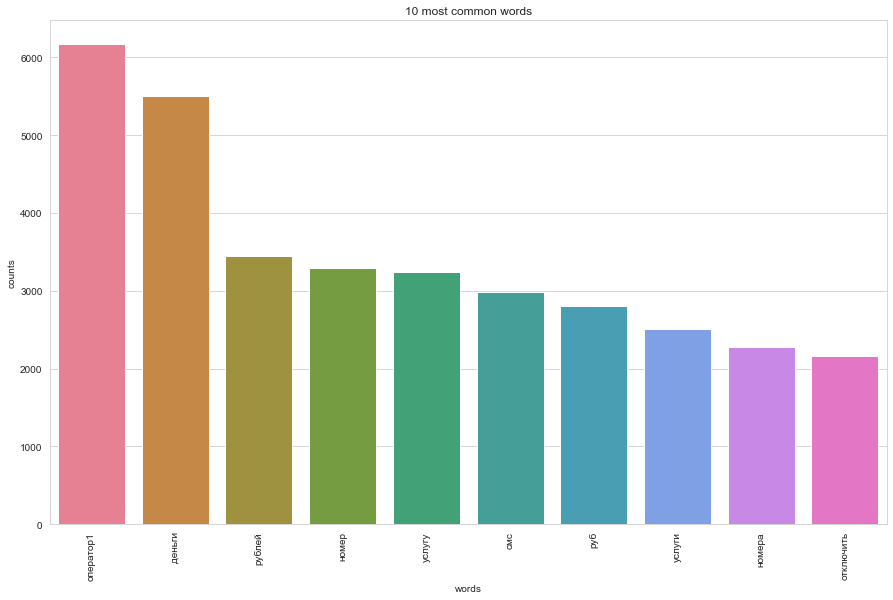

In [15]:
# Load the library with the CountVectorizer method
from stop_words import safe_get_stop_words
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline
# Helper function
def plot_10_most_common_words(count_data, count_vectorizer):
    import matplotlib.pyplot as plt
    words = count_vectorizer.get_feature_names()
    total_counts = np.zeros(len(words))
    for t in count_data:
        total_counts+=t.toarray()[0]
    
    count_dict = (zip(words, total_counts))
    count_dict = sorted(count_dict, key=lambda x:x[1], reverse=True)[0:10]
    words = [w[0] for w in count_dict]
    counts = [w[1] for w in count_dict]
    x_pos = np.arange(len(words)) 
    
    plt.figure(2, figsize=(15, 15/1.6180))
    plt.subplot(title='10 most common words')
    sns.set_context("notebook", font_scale=1.25, rc={"lines.linewidth": 2.5})
    sns.barplot(x_pos, counts, palette='husl')
    plt.xticks(x_pos, words, rotation=90) 
    plt.xlabel('words')
    plt.ylabel('counts')
    plt.show()
# Initialise the count vectorizer with the English stop words
count_vectorizer = CountVectorizer(stop_words = safe_get_stop_words('ru'))
# Fit and transform the processed titles
count_data = count_vectorizer.fit_transform(df1['Text'])
# Visualise the 10 most common words
plot_10_most_common_words(count_data, count_vectorizer)

Самое частое встрчающееся слово оператор, также мы можем видеть, что у нас присуствует слово "номер" и "номера", значит, нам нужно будет проделать lemmatization.

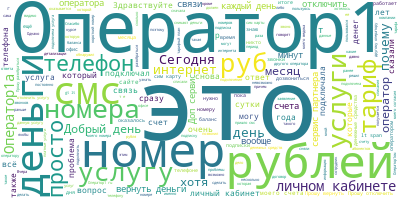

In [17]:
# Import the wordcloud library
from wordcloud import WordCloud
# Join the different processed titles together.
long_string = ','.join(list(df1['Text'].values))
# Create a WordCloud object
wordcloud = WordCloud(background_color="white", max_words=5000, contour_width=3, contour_color='steelblue', stopwords = russian_stopwords)
# Generate a word cloud
wordcloud.generate(long_string)
# Visualize the word cloud
wordcloud.to_image()

По нарисованному вордклауду можно расширить наш список russian_stopwords например, словомо "Оператор1", мы итак знаем, что рассматриваемый нами датасет это оператор1. 

In [18]:
russian_stopwords.extend(['Оператор1', 'это', 'рублей', 'руб', 'почему', 'операторов', 'которым', 'мои', 'именно', 'просто', 'которым'])

In [19]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import NMF
from sklearn.pipeline import make_pipeline
from sklearn.decomposition import LatentDirichletAllocation
tfidf_vectorizer = TfidfVectorizer(stop_words=russian_stopwords, ngram_range=(2,3))
lda = LatentDirichletAllocation(n_components=3)
pipe = make_pipeline(tfidf_vectorizer, lda)
pipe.fit(df1['Text'])
def print_top_words(model, feature_names, n_top_words):
    for topic_idx, topic in enumerate(model.components_):
        message = "Topic #%d: " % topic_idx
        message += ", ".join([feature_names[i]
                             for i in topic.argsort()[:-n_top_words - 1:-1]])
        print(message)
    print()
print_top_words(lda, tfidf_vectorizer.get_feature_names(), n_top_words=7)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:383: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['оператор1'] not in stop_words.
  warnings.warn('Your stop_words may be inconsistent with '


Topic #0: вернуть деньги, сервис партнера, доп сервис, доп сервис партнера, каждый день, личном кабинете, прошу отключить
Topic #1: каждый день, личном кабинете, вернуть деньги, прошу отключить, добрый день, отключить услугу, сервис партнера
Topic #2: отключить услугу, вернуть деньги, прошу отключить, каждый день, личном кабинете, добрый день, личный кабинет



Мы получили основные темы нашего первого датасета. Почему мы выбрали 3 топика? Вбирая большее количество тем, замечаем, что разница между ними достаточно маленькая, поэтому останавливаемся на оптимальном количестве 3. А теперь более подробно рассмотрим наш датасет, используя веса. 

In [24]:
# Build the bigram and trigram models
# bigram = gensim.models.Phrases(data_words, min_count=5, threshold=100) # higher threshold fewer phrases.
# trigram = gensim.models.Phrases(bigram[data_words], threshold=100)  
# bigram_mod = gensim.models.phrases.Phraser(bigram)
# trigram_mod = gensim.models.phrases.Phraser(trigram)
import ru2

# !python3 -m spacy download en  # run in terminal once
def process_words(texts, stop_words=russian_stopwords):
    """Remove Stopwords, Form Bigrams, Trigrams and Lemmatization"""
    texts = [[word for word in simple_preprocess(str(doc)) if word not in russian_stopwords] for doc in texts]
    #texts = [bigram_mod[doc] for doc in texts]
    #texts = [trigram_mod[bigram_mod[doc]] for doc in texts]
    texts_out = []
    nlp = spacy.load('ru2', disable=['tagger', 'parser', 'NER']) #ru2
    for sent in texts:
        doc = nlp(" ".join(sent)) 
        texts_out.append([token.lemma_ for token in doc])
    # remove stopwords once more after lemmatization
    texts_out = [[word for word in simple_preprocess(str(doc)) if word not in russian_stopwords] for doc in texts_out]    
    return texts_out

data_ready = process_words(data_words)

In [25]:
id2word = corpora.Dictionary(data_ready)

# Create Corpus: Term Document Frequency
corpus = [id2word.doc2bow(text) for text in data_ready]

#Build LDA model
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=3, 
                                           random_state=100,
                                           update_every=1,
                                           chunksize=10,
                                           passes=10,
                                           alpha='symmetric',
                                           iterations=100,
                                           per_word_topics=True)

pprint(lda_model.print_topics())

[(0,
  '0.025*"связь" + 0.024*"работать" + 0.020*"телефон" + 0.013*"проблема" + '
  '0.012*"дозвониться" + 0.011*"интернет" + 0.008*"сеть" + 0.007*"сети" + '
  '0.006*"невозможно" + 0.006*"связи"'),
 (1,
  '0.033*"оператор" + 0.011*"тариф" + 0.010*"номер" + 0.009*"офис" + '
  '0.006*"ответ" + 0.006*"связи" + 0.006*"сказать" + 0.006*"телефон" + '
  '0.006*"мочь" + 0.006*"вопрос"'),
 (2,
  '0.039*"услуга" + 0.028*"деньги" + 0.021*"рублеи" + 0.017*"услуги" + '
  '0.016*"номер" + 0.015*"смс" + 0.014*"вернуть" + 0.014*"подключить" + '
  '0.013*"отключить" + 0.013*"счета"')]


    Данный вывод показывает нам распределение 7 слов по темам и их вклад в определенную, свойственную им тему.

In [26]:
def format_topics_sentences(ldamodel=None, corpus=corpus, texts=data):
    # Init output
    sent_topics_df = pd.DataFrame()

    # Get main topic in each document
    for i, row_list in enumerate(ldamodel[corpus]):
        row = row_list[0] if ldamodel.per_word_topics else row_list            
        # print(row)
        row = sorted(row, key=lambda x: (x[1]), reverse=True)
        # Get the Dominant topic, Perc Contribution and Keywords for each document
        for j, (topic_num, prop_topic) in enumerate(row):
            if j == 0:  # => dominant topic
                wp = ldamodel.show_topic(topic_num)
                topic_keywords = ", ".join([word for word, prop in wp])
                sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
            else:
                break
    sent_topics_df.columns = ['Dominant_Topic', 'Perc_Contribution', 'Topic_Keywords']
    # Add original text to the end of the output
    contents = pd.Series(texts)
    sent_topics_df = pd.concat([sent_topics_df, contents], axis=1)
    return(sent_topics_df)

df_topic_sents_keywords = format_topics_sentences(ldamodel=lda_model, corpus=corpus, texts=data_words)

# Format
df_dominant_topic1 = df_topic_sents_keywords.reset_index()
df_dominant_topic1.columns = ['Document_No', 'Dominant_Topic', 'Topic_Perc_Contrib', 'Keywords', 'Text']
df_dominant_topic1.head(40)

,Document_No,Dominant_Topic,Topic_Perc_Contrib,Keywords,Text
0,0,1.0,0.7591,"оператор, тариф, номер, офис, ответ, связи, сказать, телефон, мочь, вопрос","[являюсь, клиентом, оператор, более, лет, за, это, время, случались, мелкие, недоразумения, которые, быстро, адекватно, решались, но, эта, ситуация, сама, по, себе, не, представляющая, особои, важности, меня, удивила, поставила, тупик, на, мои, телефон, поступило, sms, сообщение, спам, от, организации, которои, не, давал, свои, номер, телефона, согласия, на, получение, рекламы, переслал, данное, сообщение, указанием, отправителя, даты, времени, получения, по, номеру, для, борьбы, со, спамом, также, была, сформирована, отправлена, жалоба, фас, рф, через, некоторое, время, получил, следующии, ответ, от, оператор, уважаемыи, клиент, спасибо, за, ваше, обращение, факт, поступления, указанного, вами, сообщения, не, зафиксирован, просим, предоставить, новые, примеры, благодарим, за, сотрудничество, заботои, вас, ваш, ...]"
1,1,1.0,0.5975,"оператор, тариф, номер, офис, ответ, связи, сказать, телефон, мочь, вопрос","[являюсь, счастливым, обладателем, тарифа, все, для, семьи, за, сущие, копеики, получаю, связь, интернет, телевидение, все, бы, ничего, но, трафик, из, пакета, мобильного, интернета, его, меня, гб, расходуется, все, быстрее, быстрее, заказав, детализацию, понял, что, основная, доля, списании, моего, счета, идет, по, сессиям, мб, иногда, такими, пакетами, расходуется, до, гб, день, что, само, по, себе, подозрительно, потому, что, обычно, телефон, качает, не, ровные, цифры, объема, пакетов, они, редко, повторяются, также, подозрительно, что, когда, гб, иссякают, скачка, пакетов, тоже, сходит, на, нет, вместо, лошадиных, закачек, по, мб, остаются, только, редкие, по, мб, хотя, интернет, проваидер, предоставляет, без, лимита, но, на, небольшои, скорости, ...]"
2,2,1.0,0.7515,"оператор, тариф, номер, офис, ответ, связи, сказать, телефон, мочь, вопрос","[являюсь, пользователем, услуг, сотовои, связи, компании, вымпелком, по, необходимости, работе, были, приобретены, сим, карты, какое, то, время, пользовались, потом, один, прекрасныи, день, узнал, что, мои, сим, карты, заблокированы, но, это, полбеды, на, всех, номерах, был, положительныи, баланс, итоге, сумма, более, рублеи, на, моих, лицевых, счетах, исчезли, естественно, доступ, личныи, кабинет, заблокирован, по, номеру, было, написано, заявление, мини, офисе, но, ответа, так, не, было, по, номерам, был, запрос, через, саит, но, после, вопроса, как, вернуть, деньги, ответов, не, было]"
3,3,1.0,0.7093,"оператор, тариф, номер, офис, ответ, связи, сказать, телефон, мочь, вопрос","[являюсь, пользователем, сотового, оператора, оператор, уже, лет, но, уже, просто, нет, сил, терпеть, некачественное, предоставление, услуг, за, которое, так, платишь, много, средств, так, они, еще, подключают, платные, услуги, без, оповещения, ранее, они, улаживали, такие, нюансы, тех, кто, вовремя, замечал, теперь, при, общении, сотрудником, которым, не, так, просто, связаться, теперь, обвинения, идут, нашу, сторону, что, это, мы, подключаем, сами, или, это, саиты, подключают, но, оператор, этому, отношения, не, имеет, по, версии, сотрудников, наверно, нужно, сидеть, онлаин, личном, кабинете, следить, чтобы, ничего, не, подключилось, хотя, думаю, что, таком, случае, вины, абонента, будет, еще, больше, как, хорошо, что, теперь, можно, менять, оператора, без, ...]"
4,4,1.0,0.5903,"оператор, тариф, номер, офис, ответ, связи, сказать, телефон, мочь, вопрос","[являюсь, пользователем, оператор, лет, последние, лет, номером, практически, не, пользуюсь, на, работе, выдали, корпоративныи, номер, год, назад, заметил, что, стали, пропадать, деньги, со, счета, оказалось, молча, подключили, какую, то, услугу, спокоино, списывали, коп, день, мелочь, неприятно, отключил, на, саите, сеичас, смотрю, баланса, опять, пропало, лишним, рублеи, захожу, на, саит, посмотреть, детализацию, вижу, что, оператор, молча, перевел, мои, старыи, тариф, хочу, сказать, постоплатного, 

In [27]:
df_dominant_topic1[['Dominant_Topic', 'Keywords']].drop_duplicates()

,Dominant_Topic,Keywords
0,1.0,"оператор, тариф, номер, офис, ответ, связи, сказать, телефон, мочь, вопрос"
6,0.0,"связь, работать, телефон, проблема, дозвониться, интернет, сеть, сети, невозможно, связи"
11,2.0,"услуга, деньги, рублеи, услуги, номер, смс, вернуть, подключить, отключить, счета"


In [28]:
df_dominant_topic1['Dominant_Topic'] = df_dominant_topic1['Dominant_Topic'].astype('int64')
df_distr_1 = df_dominant_topic1['Dominant_Topic'].value_counts().reset_index().merge(  
    df_dominant_topic1['Dominant_Topic'].value_counts(1).reset_index(), on='index').rename(columns=({
    'index': 'Dominant_Topic',     
    'Dominant_Topic_x': 'count',
    'Dominant_Topic_y': 'proportion'
})).merge(df_dominant_topic1[['Dominant_Topic', 'Keywords']].drop_duplicates(), 
         on = 'Dominant_Topic').sort_values('proportion', ascending=False).reset_index(drop=True)
df_distr_1

,Dominant_Topic,count,proportion,Keywords
0,2,4436,0.592652,"услуга, деньги, рублеи, услуги, номер, смс, вернуть, подключить, отключить, счета"
1,1,2786,0.372211,"оператор, тариф, номер, офис, ответ, связи, сказать, телефон, мочь, вопрос"
2,0,263,0.035137,"связь, работать, телефон, проблема, дозвониться, интернет, сеть, сети, невозможно, связи"


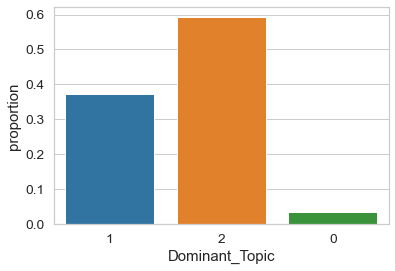

In [29]:
import seaborn as sns
sns.barplot(x="Dominant_Topic", y="proportion", data=df_distr_1, order = [1, 2, 0]);

Это таблица показывает нам тему, ее ключевые слова и предложения, свойственные ей. 

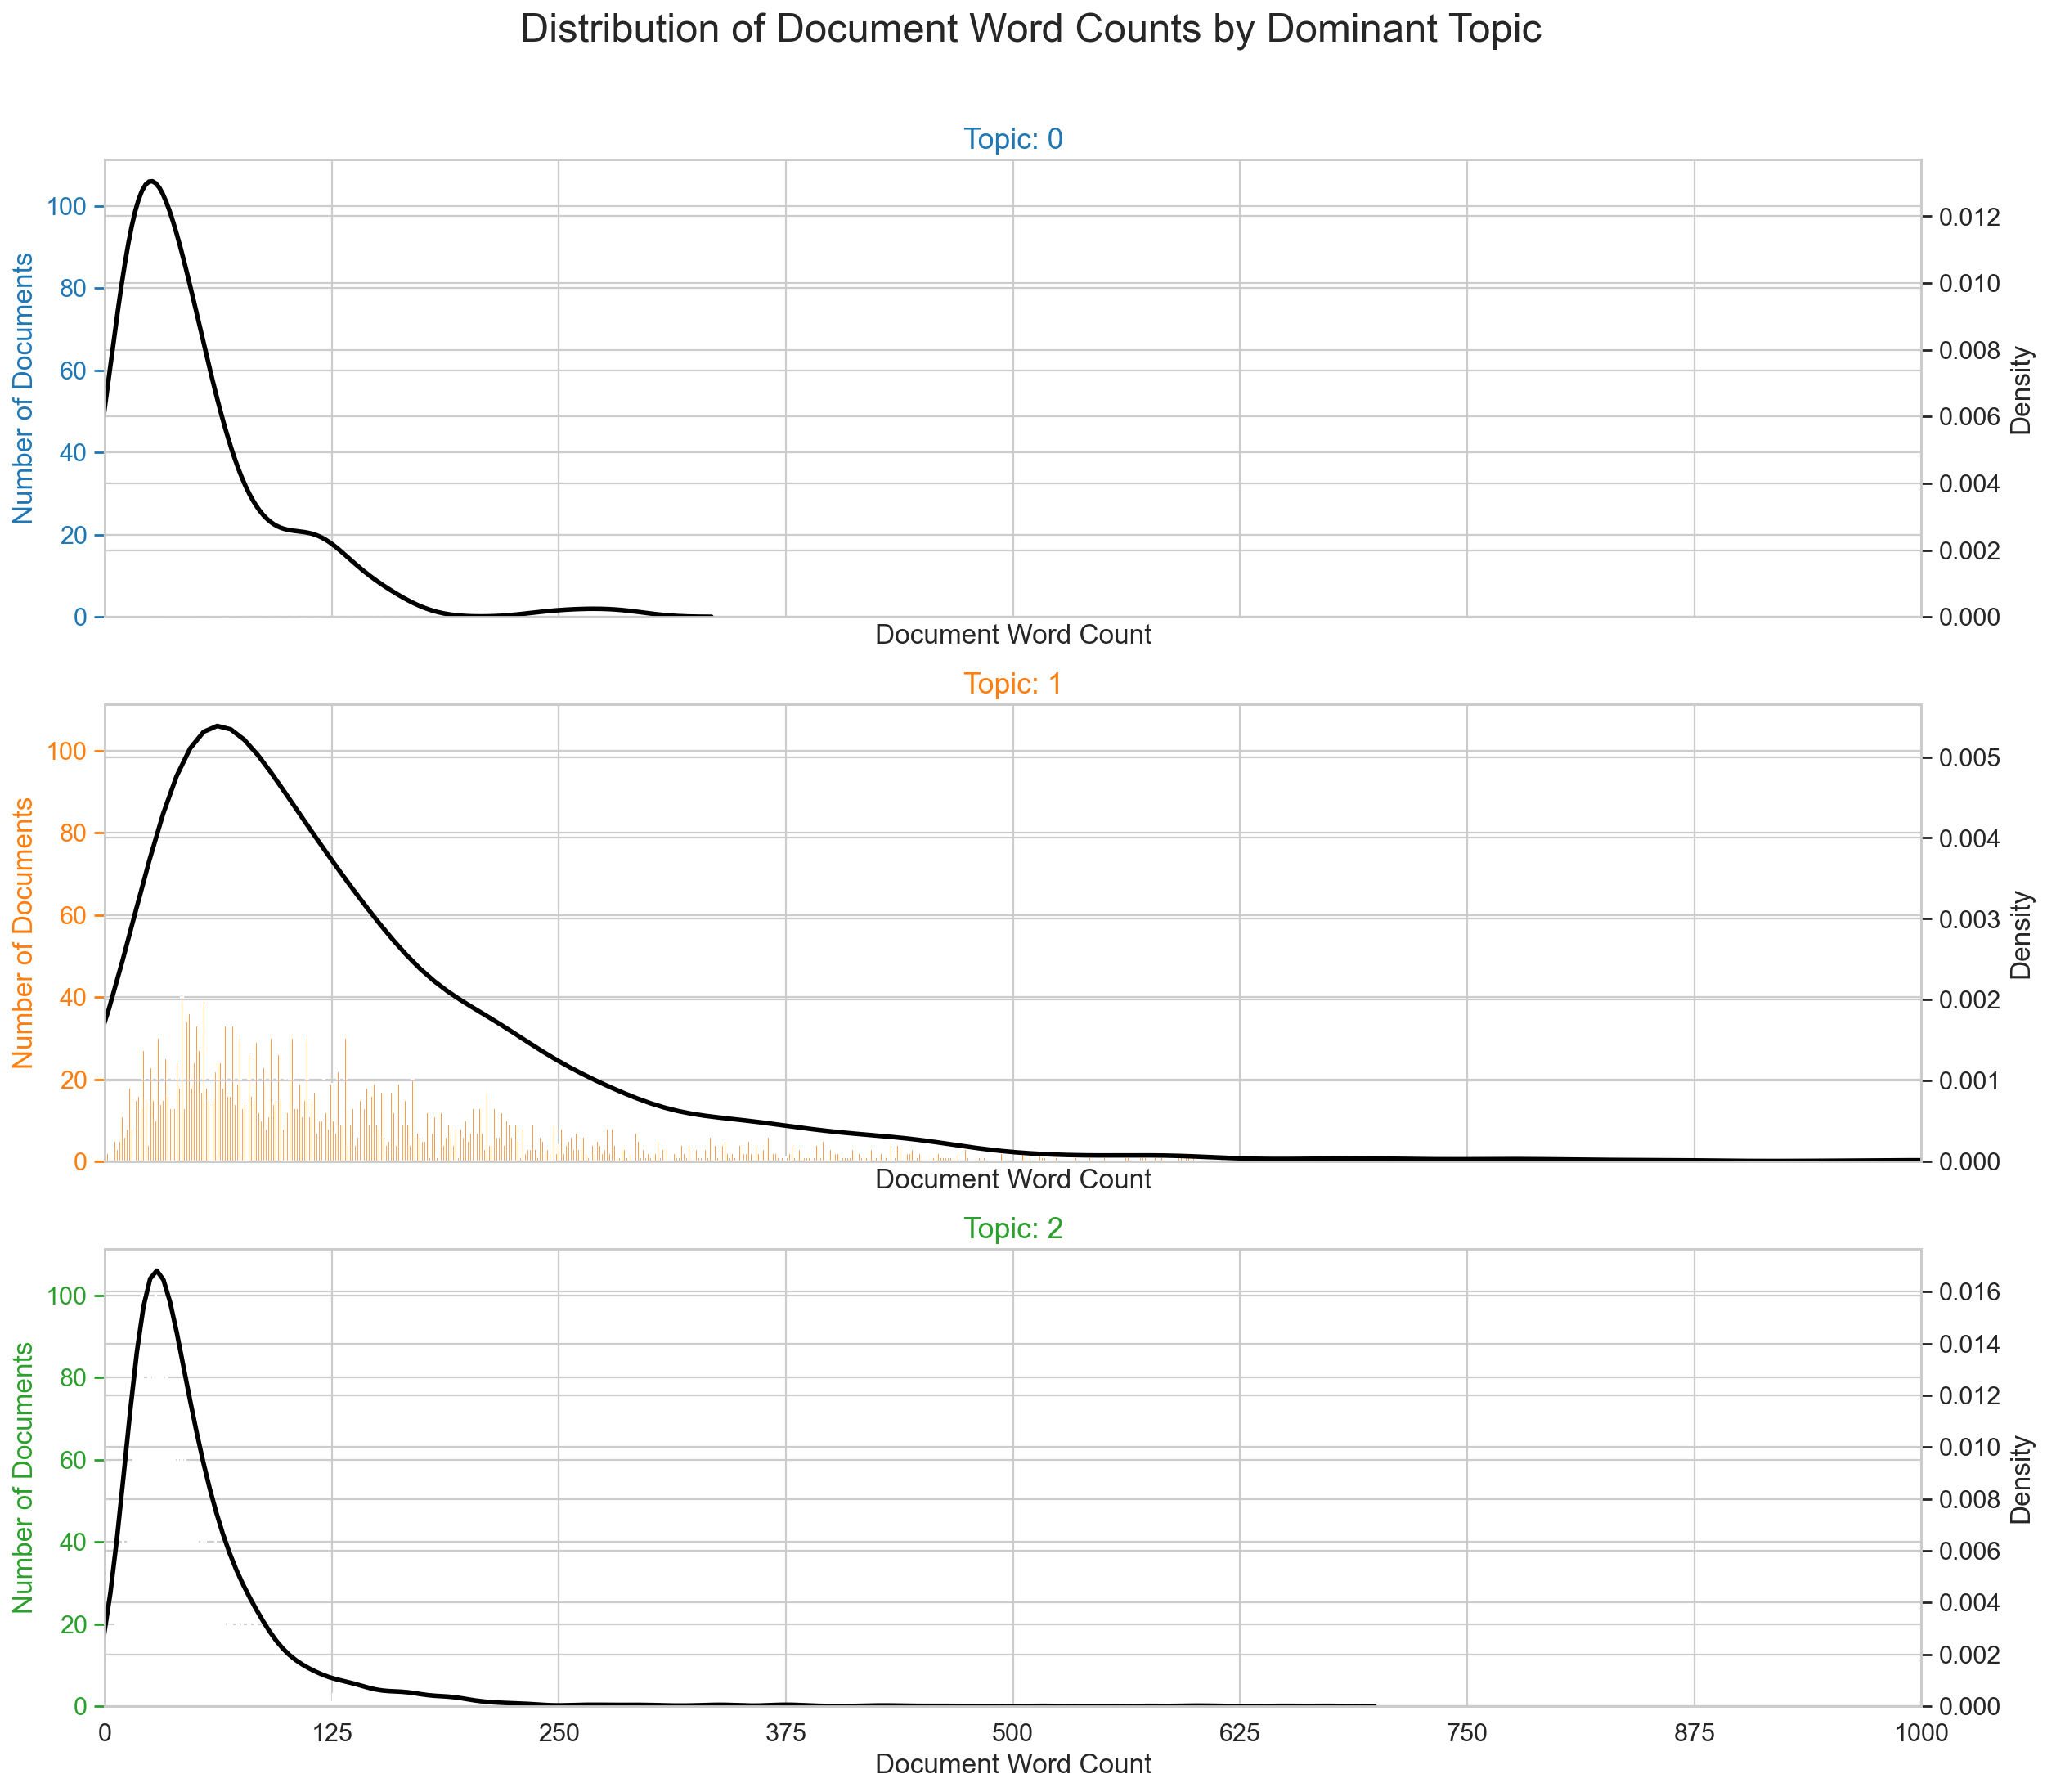

In [31]:
import seaborn as sns
import matplotlib.colors as mcolors
cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]  # more colors: 'mcolors.XKCD_COLORS'

fig, axes = plt.subplots(3,1,figsize=(16,14), dpi=160, sharex=True, sharey=True)

for i, ax in enumerate(axes.flatten()):    
    df_dominant_topic_sub = df_dominant_topic1.loc[df_dominant_topic1.Dominant_Topic == i, :]
    doc_lens = [len(d) for d in df_dominant_topic_sub.Text]
    ax.hist(doc_lens, bins = 1000, color=cols[i])
    ax.tick_params(axis='y', labelcolor=cols[i], color=cols[i])
    sns.kdeplot(doc_lens, color="black", shade=False, ax=ax.twinx())
    ax.set(xlim=(0, 1000), xlabel='Document Word Count')
    ax.set_ylabel('Number of Documents', color=cols[i])
    ax.set_title('Topic: '+str(i), fontdict=dict(size=16, color=cols[i]))

fig.tight_layout()
fig.subplots_adjust(top=0.90)
plt.xticks(np.linspace(0,1000,9))
fig.suptitle('Distribution of Document Word Counts by Dominant Topic', fontsize=22)
plt.show()

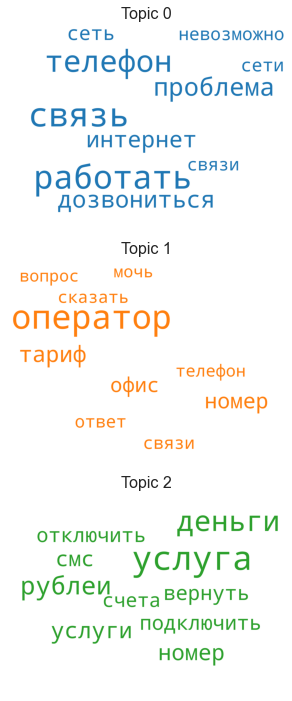

In [33]:
# 1. Wordcloud of Top N words in each topic
from matplotlib import pyplot as plt
from wordcloud import WordCloud, STOPWORDS
import matplotlib.colors as mcolors

cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]  # more colors: 'mcolors.XKCD_COLORS'

cloud = WordCloud(stopwords=russian_stopwords,
                  background_color='white',
                  width=2500,
                  height=1800,
                  max_words=10,
                  colormap='tab10',
                  color_func=lambda *args, **kwargs: cols[i],
                  prefer_horizontal=1.0)

topics = lda_model.show_topics(formatted=False)

fig, axes = plt.subplots(3, 1, figsize=(10,10), sharex=True, sharey=True)

for i, ax in enumerate(axes.flatten()):
    fig.add_subplot(ax)
    topic_words = dict(topics[i][1])
    cloud.generate_from_frequencies(topic_words, max_font_size=300)
    plt.gca().imshow(cloud)
    plt.gca().set_title('Topic ' + str(i), fontdict=dict(size=16))
    plt.gca().axis('off')
plt.subplots_adjust(wspace=0, hspace=0)
plt.axis('off')
plt.margins(x=0, y=0)
plt.tight_layout()
plt.show()

<ipython-input-34-370f2475c0d7>:24: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(df.loc[df.topic_id==i, 'word'], rotation=30, horizontalalignment= 'right')
<ipython-input-34-370f2475c0d7>:24: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(df.loc[df.topic_id==i, 'word'], rotation=30, horizontalalignment= 'right')
<ipython-input-34-370f2475c0d7>:24: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(df.loc[df.topic_id==i, 'word'], rotation=30, horizontalalignment= 'right')


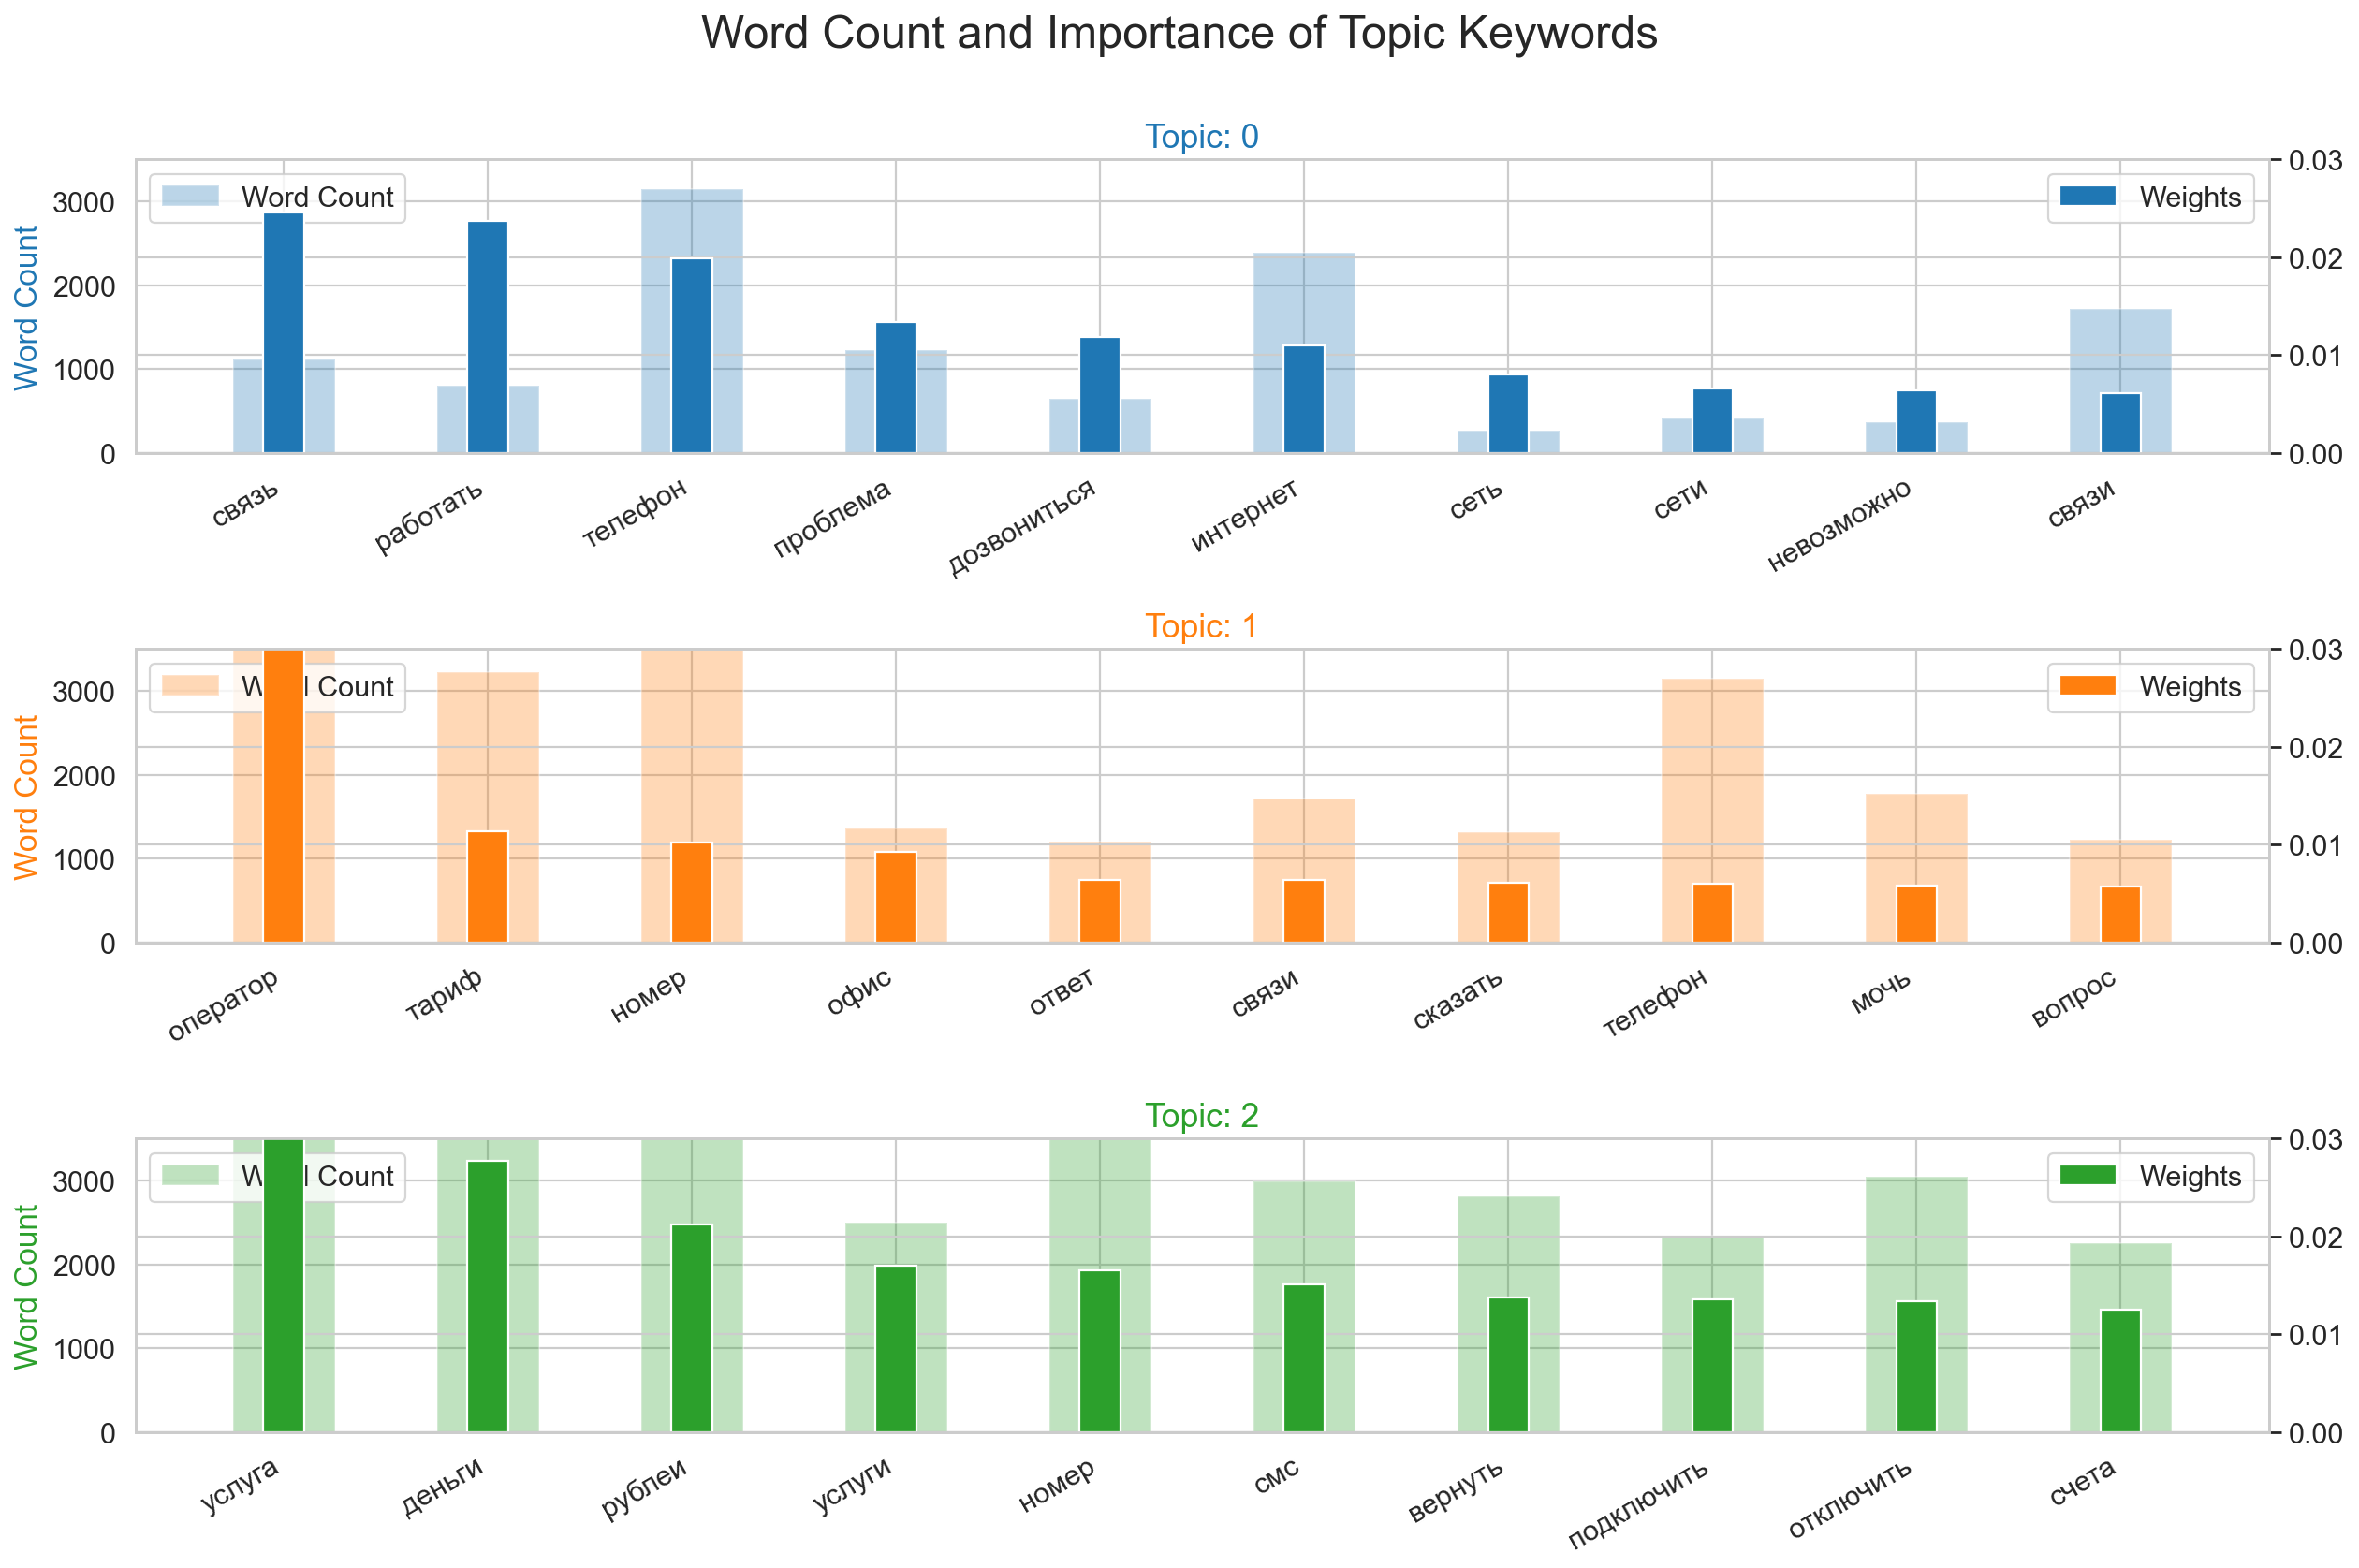

In [34]:
from collections import Counter
topics = lda_model.show_topics(formatted=False)
data_flat = [w for w_list in data_ready for w in w_list]
counter = Counter(data_flat)

out = []
for i, topic in topics:
    for word, weight in topic:
        out.append([word, i , weight, counter[word]])

df = pd.DataFrame(out, columns=['word', 'topic_id', 'importance', 'word_count'])        

# Plot Word Count and Weights of Topic Keywords
fig, axes = plt.subplots(3, 1, figsize=(16,10), sharey=True, dpi=160)
cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]
for i, ax in enumerate(axes.flatten()):
    ax.bar(x='word', height="word_count", data=df.loc[df.topic_id==i, :], color=cols[i], width=0.5, alpha=0.3, label='Word Count')
    ax_twin = ax.twinx()
    ax_twin.bar(x='word', height="importance", data=df.loc[df.topic_id==i, :], color=cols[i], width=0.2, label='Weights')
    ax.set_ylabel('Word Count', color=cols[i])
    ax_twin.set_ylim(0, 0.030); ax.set_ylim(0, 3500)
    ax.set_title('Topic: ' + str(i), color=cols[i], fontsize=16)
    ax.tick_params(axis='y', left=False)
    ax.set_xticklabels(df.loc[df.topic_id==i, 'word'], rotation=30, horizontalalignment= 'right')
    ax.legend(loc='upper left'); ax_twin.legend(loc='upper right')

fig.tight_layout(w_pad=2)    
fig.suptitle('Word Count and Importance of Topic Keywords', fontsize=22, y=1.05)    
plt.show()

In [35]:
# Build LDA model
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus, 
                                           id2word=id2word, 
                                           num_topics=3,
                                           random_state=123,
                                           chunksize=100, # number of docs in each training set
                                           passes=5, 
                                           alpha=0.01, # hyperparameter: represents document topic density
                                           eta='auto', # hyperparameter: word density
                                           iterations=400,
                                           per_word_topics=True)

In [37]:
import pyLDAvis.gensim
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(lda_model, corpus, id2word)
vis

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
1      0.175499 -0.108067       1        1  40.970198
2     -0.220305 -0.053274       2        1  29.554913
0      0.044806  0.161341       3        1  29.474889, topic_info=          Term         Freq        Total Category  logprob  loglift
216     услуга  6445.000000  6445.000000  Default  30.0000  30.0000
186     деньги  4911.000000  4911.000000  Default  29.0000  29.0000
175      тариф  2771.000000  2771.000000  Default  28.0000  28.0000
289  отключить  2436.000000  2436.000000  Default  27.0000  27.0000
173      счета  2122.000000  2122.000000  Default  26.0000  26.0000
..         ...          ...          ...      ...      ...      ...
120   интернет   651.587377  2201.086612   Topic3  -5.2975   0.0043
383      месяц   554.921220  1461.713762   Topic3  -5.4581   0.2531
533    сегодня   449.764927   870.741513   Topic3  -5.6682   0.5610
356     решить   464.348612  1035.325281   Topic3  -5.6363   0.4198
216     услуга   628.890481  6445.718138   Topic3  -5.3329  -1.1056

[233 rows x 6 columns], token_table=      Topic      Freq      Term
term                           
4175      2  0.992755  cdp_subs
3053      1  0.995704        gt
4598      3  0.991988       kbp
3055      1  0.995758        lt
3059      1  0.996979      span
...     ...       ...       ...
216       3  0.097584    услуга
272       1  0.077751    услуги
272       2  0.825877    услуги
272       3  0.095980    услуги
3869      2  0.992769   эрудита

[336 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[2, 3, 1])

### Анализ таблицы 2 <a class="anchor" id="ch4"></a>

Далее мы проделаем не полоценный анализ как с таблицей 1, а только выведем несколько диаграмм, которые нам особенно помогут с выбором корректной темы. 

In [38]:
data2 = df2.Text.values.tolist()
data_words2 = list(sent_to_words(data2))
print(data_words2[:1])

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[['оператор', 'снова', 'обманывает', 'оператор', 'появилась', 'новая', 'развод', 'услуга', 'мегофон', 'тв', 'которая', 'при', 'подключении', 'спустя', 'днеи', 'начинает', 'брать', 'абонентскую', 'плату', 'рублеи', 'день', 'причем', 'неважно', 'пользуетесь', 'вы', 'ею', 'или', 'нет', 'неважно', 'есть', 'ли', 'она', 'бесплатно', 'вашем', 'пакете', 'услуг', 'личном', 'кабинете', 'эта', 'платная', 'услуга', 'нигде', 'не', 'отображается', 'девушка', 'оператор', 'вам', 'скажет', 'что', 'вас', 'нет', 'платных', 'услуг', 'эту', 'абонент', 'плату', 'можно', 'отключить', 'только', 'специальнои', 'техническои', 'поддержке', 'оператор', 'тв', 'причем', 'эта', 'поддержка', 'очень', 'занята', 'вас', 'могут', 'по', 'кругу', 'вести', 'нескольк', 'часов', 'будьте', 'бдительны', 'не', 'попадаитесь', 'очередную', 'ловушку', 'оператора', 'сотовои', 'связи', 'буду', 'искать', 'другую', 'компанию', 'думаю', 'другого', 'оператора', 'интернет', 'быстрее']]


In [39]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import NMF
from sklearn.pipeline import make_pipeline
from sklearn.decomposition import LatentDirichletAllocation
tfidf_vectorizer2 = TfidfVectorizer(stop_words=russian_stopwords, ngram_range=(2,3))
lda2 = LatentDirichletAllocation(n_components=3)
pipe = make_pipeline(tfidf_vectorizer2, lda2)
pipe.fit(df2['Text'])
print_top_words(lda2, tfidf_vectorizer2.get_feature_names(), n_top_words=9)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:383: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['оператор1'] not in stop_words.
  warnings.warn('Your stop_words may be inconsistent with '


Topic #0: другого оператора, личный кабинет, сим карту, другому оператору, личном кабинете, добрый день, сих пор, сим карты, службу поддержки
Topic #1: другому оператору, сим карту, добрый день, личный кабинет, другого оператора, каждый день, личном кабинете, компании оператор2, абонентской платы
Topic #2: личном кабинете, другому оператору, сим карту, личный кабинет, другого оператора, добрый день, компании оператор2, тарифный план, каждый день



In [40]:
data_ready2 = process_words(data_words2)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
C:\ProgramData\Anaconda3\lib\site-packages\spacy\util.py:275: UserWarning: [W031] Model 'ru_model' (0.2) requires spaCy v2.1 and is incompatible with the current spaCy version (2.3.5). This may lead to unexpected results or runtime errors. To resolve this, download a newer compatible model or retrain your custom model with the current spaCy version. For more details and available updates, run: python -m spacy validate
  warnings.warn(warn_msg)


In [41]:
id2word2 = corpora.Dictionary(data_ready2)

# Create Corpus: Term Document Frequency
corpus2 = [id2word2.doc2bow(text) for text in data_ready2]

# Build LDA model
lda_model2 = gensim.models.ldamodel.LdaModel(corpus=corpus2,
                                           id2word=id2word2,
                                           num_topics=3, 
                                           random_state=100,
                                           update_every=1,
                                           chunksize=10,
                                           passes=10,
                                           alpha='symmetric',
                                           iterations=100,
                                           per_word_topics=True)

pprint(lda_model2.print_topics())

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[(0,
  '0.046*"тариф" + 0.025*"оператор" + 0.015*"интернет" + 0.014*"план" + '
  '0.011*"связь" + 0.010*"минут" + 0.008*"пакет" + 0.008*"трафик" + '
  '0.007*"оператора" + 0.007*"связи"'),
 (1,
  '0.028*"оператор" + 0.011*"услуга" + 0.010*"деньги" + 0.010*"смс" + '
  '0.009*"номер" + 0.008*"рублеи" + 0.007*"баланс" + 0.007*"телефон" + '
  '0.006*"день" + 0.006*"связи"'),
 (2,
  '0.021*"оператор" + 0.019*"номер" + 0.014*"салон" + 0.014*"lt" + 0.014*"gt" '
  '+ 0.013*"офис" + 0.011*"днеи" + 0.011*"заявка" + 0.011*"span" + '
  '0.010*"связи"')]


In [42]:
df_topic_sents_keywords2 = format_topics_sentences(ldamodel=lda_model2, corpus=corpus2, texts=data_words2)

# Format
df_dominant_topic2 = df_topic_sents_keywords2.reset_index()
df_dominant_topic2.columns = ['Document_No', 'Dominant_Topic', 'Topic_Perc_Contrib', 'Keywords', 'Text']
df_dominant_topic2.head(20)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Document_No,Dominant_Topic,Topic_Perc_Contrib,Keywords,Text
0,0,1.0,0.8382,"оператор, услуга, деньги, смс, номер, рублеи, баланс, телефон, день, связи","[оператор, снова, обманывает, оператор, появилась, новая, развод, услуга, мегофон, тв, которая, при, подключении, спустя, днеи, начинает, брать, абонентскую, плату, рублеи, день, причем, неважно, пользуетесь, вы, ею, или, нет, неважно, есть, ли, она, бесплатно, вашем, пакете, услуг, личном, кабинете, эта, платная, услуга, нигде, не, отображается, девушка, оператор, вам, скажет, что, вас, нет, платных, услуг, эту, абонент, плату, можно, отключить, только, специальнои, техническои, поддержке, оператор, тв, причем, эта, поддержка, очень, занята, вас, могут, по, кругу, вести, нескольк, часов, будьте, бдительны, не, попадаитесь, очередную, ловушку, оператора, сотовои, связи, буду, искать, другую, компанию, думаю, другого, оператора, интернет, быстрее]"
1,1,1.0,0.5265,"оператор, услуга, деньги, смс, номер, рублеи, баланс, телефон, день, связи","[являясь, руководителем, корпорации, оператор, всегда, считал, что, право, устанавливать, тарифные, планы, сотрудникам, суммы, которые, они, могут, потратить, из, моего, бюджета, на, связь, есть, только, меня, доверенных, мною, лиц, соответственно, обязанность, по, оплате, этих, услуг, тоже, возлагается, на, мое, юр, лицо, но, вот, компания, мегофон, решила, по, другому, сотрудница, телемаркетинга, позвонила, сотруднице, моеи, корпорации, они, мило, так, побеседовали, каждая, сделала, свои, выводы, сотрудница, телемаркетинга, оператор, решила, что, можно, поменять, тариф, руб, месяц, на, тариф, которыи, мне, обошелся, за, ноябрь, сотрудница, моеи, корпорации, утверждает, что, не, давала, согласия, на, смену, тарифного, плана, ничего, тарифах, не, понимает, не, оплачивает, услуги, корпоративнои, связи, личными, ...]"
2,2,1.0,0.4880,"оператор, услуга, деньги, смс, номер, рублеи, баланс, телефон, день, связи","[являясь, пользователем, услуг, данного, оператора, связи, течение, многих, лет, более, учетом, того, что, связи, географиеи, поездок, некоторых, других, нюансов, является, по, сути, для, меня, основные, проблемы, которыми, приходится, сталкиваться, это, некомпетентная, техническая, поддержка, постоянное, обновление, баз, данных, номеров, технические, работы, на, номерах, которые, ведутся, годами, вообще, не, представляю, как, такое, может, быть, сохранением, одних, тех, же, проблем, приводящие, ограничению, пользованием, отдельными, услугами, очереднои, раз, перестал, работать, прямои, городскои, номер, при, изменении, тарифа, при, положительном, балансе, приняли, обращение, службу, техническои, поддержки, по, телефону, сказали, что, проблему, решат, течение, суток, при, очередном, звонке, по, номеру, сказали, что, решат, проблему, течение, нескольких, днеи, ...]"
3,3,1.0,0.8727,"оператор, услуга, деньги, смс, номер, рублеи, баланс, телефон, день, связи","[являясь, клиентом, оператор, его, основания, nw, gsm, была, шокирована, отношением, компании, оператор, своим, клиентам, меня, тариф, копеики, оплату, производила, постоянно, никогда, не, было, проблем, как, вдруг, оказалось, что, подключена, услуга, трава, ру, которои, даже, не, подозревала, моего, счета, списывались, каждыи, день, по, даннои, услугои, были, списаны, меня, данныи, момент, имеется, задолженность, по, этои, услуги, господа, оператор, цы, вас, не, просила, ее, подключать, самостоятельно, не, подключалась, даже, не, знаю, как, пользоватьсяи, не, пользовалась, верните, деньги, за, что, вы, так, не, хотелось, бы, расстаться, оператор, ом, не, пользуюсь, сим, картои, услугами, оператор, августа]"
4,4,1.0,0.7132,"оператор, услуга, деньги, смс, номер, рублеи, баланс, телефон, день, связи","[являюсь, нет, являлся, надеюсь, абонентом, оператор, прямым, номером, января, года, тариф, свобода, слова, сити, предоплаченными, минутами, исходящих, вызовов, на, любых, операторов, региона, это, важно, но, тут, произошли, события, которые, сподвигли, меня, поменять, оператора, итак, по, п

In [43]:
df_dominant_topic2['Dominant_Topic'] = df_dominant_topic2['Dominant_Topic'].astype('int64')
df_dominant_topic2.loc[df_dominant_topic2['Dominant_Topic'] == 0, 'Dominant_Topic'] = 4
df_dominant_topic2.loc[df_dominant_topic2['Dominant_Topic'] == 1, 'Dominant_Topic'] = 5
df_dominant_topic2.loc[df_dominant_topic2['Dominant_Topic'] == 2, 'Dominant_Topic'] = 6
df_dominant_topic2[['Dominant_Topic', 'Keywords']].drop_duplicates()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Dominant_Topic,Keywords
0,5,"оператор, услуга, деньги, смс, номер, рублеи, баланс, телефон, день, связи"
6,4,"тариф, оператор, интернет, план, связь, минут, пакет, трафик, оператора, связи"
45,6,"оператор, номер, салон, lt, gt, офис, днеи, заявка, span, связи"


In [44]:
df_distr_2 = df_dominant_topic2['Dominant_Topic'].value_counts().reset_index().merge(  
    df_dominant_topic2['Dominant_Topic'].value_counts(1).reset_index(), on='index').rename(columns=({
    'index': 'Dominant_Topic',     
    'Dominant_Topic_x': 'count',
    'Dominant_Topic_y': 'proportion'
})).merge(df_dominant_topic2[['Dominant_Topic', 'Keywords']].drop_duplicates(), 
         on = 'Dominant_Topic').sort_values('proportion', ascending=False).reset_index(drop=True)
df_distr_2


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Dominant_Topic,count,proportion,Keywords
0,5,1957,0.717638,"оператор, услуга, деньги, смс, номер, рублеи, баланс, телефон, день, связи"
1,4,431,0.158049,"тариф, оператор, интернет, план, связь, минут, пакет, трафик, оператора, связи"
2,6,339,0.124312,"оператор, номер, салон, lt, gt, офис, днеи, заявка, span, связи"


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


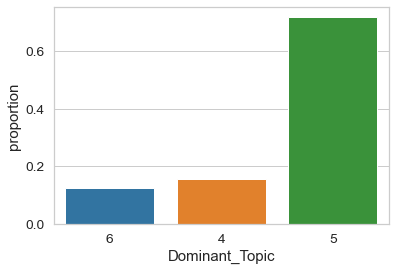

In [45]:
import seaborn as sns
sns.barplot(x="Dominant_Topic", y="proportion", data= df_distr_2, order = [6, 4, 5]);

In [46]:
import pyLDAvis.gensim
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(lda_model2, corpus2, id2word2)
vis

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
1     -0.061612 -0.200088       1        1  57.998422
2     -0.177119  0.144511       2        1  21.837629
0      0.238730  0.055577       3        1  20.163949, topic_info=           Term         Freq        Total Category  logprob  loglift
160       тариф  3216.000000  3216.000000  Default  30.0000  30.0000
229       номер  2572.000000  2572.000000  Default  29.0000  29.0000
976       салон   839.000000   839.000000  Default  28.0000  28.0000
111        план   777.000000   777.000000  Default  27.0000  27.0000
4545         lt   809.000000   809.000000  Default  26.0000  26.0000
...         ...          ...          ...      ...      ...      ...
49        связи   385.270157  1924.389725   Topic3  -4.9528  -0.0071
357       время   224.038500   664.130879   Topic3  -5.4949   0.5146
450   оператору   224.270113   694.801793   Topic3  -5.4939   0.4705
267    работать   184.022629   490.662681   Topic3  -5.6917   0.6206
95        месяц   190.209946   961.004212   Topic3  -5.6586  -0.0186

[198 rows x 6 columns], token_table=      Topic      Freq    Term
term                         
8438      1  0.011442      em
8438      2  0.829547      em
8438      3  0.160188      em
1915      2  0.997418      gt
1915      3  0.001248      gt
...     ...       ...     ...
6246      2  0.984877  филиал
872       3  0.997351    хуже
993       2  0.895451   центр
993       3  0.103193   центр
58        2  0.993248   часов

[248 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[2, 3, 1])

### Анализ таблицы 3 <a class="anchor" id="ch5"></a>

In [47]:
df3.Text = df3.Text.astype(str)
data3 = df3.Text.values.tolist()
data_words3 = list(sent_to_words(data3))

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [48]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import NMF
from sklearn.pipeline import make_pipeline
from sklearn.decomposition import LatentDirichletAllocation
tfidf_vectorizer = TfidfVectorizer(stop_words=russian_stopwords, ngram_range=(2,3))
lda = LatentDirichletAllocation(n_components=2)
pipe = make_pipeline(tfidf_vectorizer, lda)
pipe.fit(df3['Text'])
print_top_words(lda, tfidf_vectorizer.get_feature_names(), n_top_words=7)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:383: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['оператор1'] not in stop_words.
  warnings.warn('Your stop_words may be inconsistent with '


Topic #0: добрый день, сим карту, вернуть деньги, личном кабинете, сим карты, личный кабинет, прошу разобраться
Topic #1: сим карту, добрый день, сим карты, супер оператор3, вернуть деньги, личном кабинете, прошу разобраться



In [49]:
data_ready3 = process_words(data_words3)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
C:\ProgramData\Anaconda3\lib\site-packages\spacy\util.py:275: UserWarning: [W031] Model 'ru_model' (0.2) requires spaCy v2.1 and is incompatible with the current spaCy version (2.3.5). This may lead to unexpected results or runtime errors. To resolve this, download a newer compatible model or retrain your custom model with the current spaCy version. For more details and available updates, run: python -m spacy validate
  warnings.warn(warn_msg)


In [50]:
id2word3 = corpora.Dictionary(data_ready3)

# Create Corpus: Term Document Frequency
corpus3 = [id2word3.doc2bow(text) for text in data_ready3]

# Build LDA model
lda_model3 = gensim.models.ldamodel.LdaModel(corpus=corpus3,
                                           id2word=id2word3,
                                           num_topics=2, 
                                           random_state=100,
                                           update_every=1,
                                           chunksize=10,
                                           passes=10,
                                           alpha='symmetric',
                                           iterations=100,
                                           per_word_topics=True)

pprint(lda_model3.print_topics())

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[(0,
  '0.029*"оператор" + 0.012*"номер" + 0.011*"салон" + 0.009*"телефон" + '
  '0.009*"связи" + 0.007*"заявление" + 0.007*"офис" + 0.007*"обратиться" + '
  '0.006*"сказать" + 0.006*"сим"'),
 (1,
  '0.026*"услуга" + 0.020*"оператор" + 0.018*"тариф" + 0.018*"деньги" + '
  '0.013*"рублеи" + 0.010*"вернуть" + 0.009*"услуги" + 0.009*"смс" + '
  '0.009*"баланс" + 0.008*"номер"')]


In [51]:
df_topic_sents_keywords3 = format_topics_sentences(ldamodel=lda_model3, corpus=corpus3, texts=data_words3)

# Format
df_dominant_topic3 = df_topic_sents_keywords3.reset_index()
df_dominant_topic3.columns = ['Document_No', 'Dominant_Topic', 'Topic_Perc_Contrib', 'Keywords', 'Text']
df_dominant_topic3.head(20)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Document_No,Dominant_Topic,Topic_Perc_Contrib,Keywords,Text
0,0,0.0,0.6960,"оператор, номер, салон, телефон, связи, заявление, офис, обратиться, сказать, сим","[яне, вижу, особои, разницы, между, троикои, россииских, мобильных, операторов, оператор, оператор, оператор, плане, стоимости, разница, тарифах, до, рублеи, для, меня, значения, не, имеет, вот, что, имеет, так, это, уверенность, том, что, любое, время, дня, ночи, любом, месте, буду, оставаться, на, связи, этом, плане, выигрывает, несомненно, оператор, он, отлично, ловит, там, где, другие, операторы, сдуваются, на, даче, только, оператор, на, работе, то, же, кого, другои, оператор, например, постоянно, проблемами, сталкиваются, интернет, них, неплохои, недорогои, относительно, надежныи, да, срывы, иногда, случаются, но, во, первых, их, специалисты, быстро, реагируют, во, вторых, консультанты, по, телефону, не, обманывают, не, перекидывают, на, других, стараются, решить, проблему, ...]"
1,1,0.0,0.5491,"оператор, номер, салон, телефон, связи, заявление, офис, обратиться, сказать, сим","[явно, поимал, компанию, оператор, на, списании, лишних, денег, вчера, личном, кабинете, убрал, все, лишние, услуги, сделал, скрины, страниц, получил, распечатку, расходов, вечером, проверил, баланс, решил, каждыи, день, проверять, утром, запросил, баланс, сняли, наверное, как, они, любят, типа, за, услугу, вам, звонили, думаю, наверное, опять, подключили, втихаря, захожу, лк, все, то, же, никаких, платных, услуг, не, подключено, звонков, не, было, да, по, тарифу, минута, звонка, смс, ка, попытался, дозвониться, до, колл, центра, вероятно, них, так, настроено, кого, пропали, деньги, дозвониться, сразу, не, получится, минут, слушал, музыку, автофразу, время, ожидания, специалиста, составляет, более, минут, когда, подошло, время, просто, отключились, но, вам, скажут, ...]"
2,2,0.0,0.7581,"оператор, номер, салон, телефон, связи, заявление, офис, обратиться, сказать, сим","[являясь, корпоративным, клиентом, пао, оператор, обнаружил, сегодня, утром, что, на, телефоне, закончились, деньги, не, долго, думая, достал, карточку, набрав, номер, попытался, пополнить, баланс, как, это, делал, последние, лет, но, не, тут, то, было, проделав, довольно, длинную, операцию, ни, один, раз, по, вводу, параметров, карточки, мне, ответили, что, превышен, лимит, платежеи, во, как, последнии, раз, платил, месяц, назад, звоню, спрашиваю, почему, на, что, мне, говорят, то, что, прошлом, месяце, когда, обращался, тои, же, проблемои, хреновыи, банк, хреново, нажимаете, кнопки, хреновая, карточка, нас, по, первому, закону, связиста, проблем, нет, это, все, банк, виноват, хом, кредит, хом, кредит, пенои, рта, говорит, что, нас, ...]"
3,3,1.0,0.6754,"услуга, оператор, тариф, деньги, рублеи, вернуть, услуги, смс, баланс, номер","[являюсь, постоянным, пользователем, этои, компании, замечал, них, различные, подставы, увертки, виде, скрытых, платных, услуг, или, внезапно, ставших, платными, подписок, но, свежии, случаи, вынудили, переити, на, другои, тариф, связи, закрытием, старого, перешел, через, мобильное, приложение, на, супер, оператор, сразу, взяли, рублеи, за, ненужную, мне, опцию, мобильном, приложении, нет, отключения, платных, опции, через, браузер, отключил, все, супер, на, следующии, день, опять, сняли, руб, типа, за, включенную, опцию, звонки, оплачиваются, как, будь, то, она, отключена, ни, какои, связи, чтоб, написать, письмо, предоставить, информацию, нет, одни, роботы, кругом, магазинах, мерчендаизеры]"
4,4,1.0,0.8778,"услуга, оператор, тариф, деньги, рублеи, вернуть, услуги, смс, баланс, номер","[являюсь, пользователем, телефонного, номера, года, интервале, между, мин, сек, мин, сек, течение, сек, моего, счета, были, списаны, средства, размере, рублеи, без, учета, ндс, ндс, сумма, получается, еще, крупнее, средства, списаны, путем, отправки, без, моего, ведома, смс, сообщении, на, короткие, номера, ни, одно, сообщение, моего, телефона, данныи, период, времени, отправлено, не, было, оплата, каких, либо, ус

In [52]:
df_dominant_topic3['Dominant_Topic'] = df_dominant_topic3['Dominant_Topic'].astype('int64')
df_dominant_topic3.loc[df_dominant_topic3['Dominant_Topic'] == 0, 'Dominant_Topic'] = 7
df_dominant_topic3.loc[df_dominant_topic3['Dominant_Topic'] == 1, 'Dominant_Topic'] = 8
df_dominant_topic3[['Dominant_Topic', 'Keywords']].drop_duplicates()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Dominant_Topic,Keywords
0,7,"оператор, номер, салон, телефон, связи, заявление, офис, обратиться, сказать, сим"
3,8,"услуга, оператор, тариф, деньги, рублеи, вернуть, услуги, смс, баланс, номер"


In [53]:
df_distr_3 = df_dominant_topic3['Dominant_Topic'].value_counts().reset_index().merge(  
    df_dominant_topic3['Dominant_Topic'].value_counts(1).reset_index(), on='index').rename(columns=({
    'index': 'Dominant_Topic',     
    'Dominant_Topic_x': 'count',
    'Dominant_Topic_y': 'proportion'
})).merge(df_dominant_topic3[['Dominant_Topic', 'Keywords']].drop_duplicates(), 
         on = 'Dominant_Topic').sort_values('proportion', ascending=False).reset_index(drop=True)
df_distr_3

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Dominant_Topic,count,proportion,Keywords
0,7,1275,0.578494,"оператор, номер, салон, телефон, связи, заявление, офис, обратиться, сказать, сим"
1,8,929,0.421506,"услуга, оператор, тариф, деньги, рублеи, вернуть, услуги, смс, баланс, номер"


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


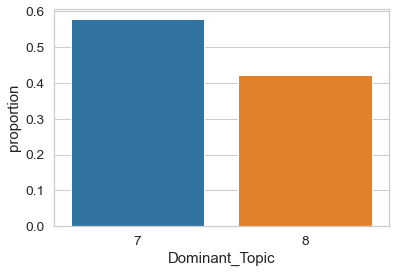

In [54]:
sns.barplot(x="Dominant_Topic", y="proportion", data= df_distr_3, order = [7, 8]);

In [55]:
import pyLDAvis.gensim
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(lda_model3, corpus3, id2word3)
vis

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


PreparedData(topic_coordinates=              x    y  topics  cluster       Freq
topic                                           
0      0.156517  0.0       1        1  62.764789
1     -0.156517  0.0       2        1  37.235211, topic_info=               Term         Freq        Total Category  logprob  loglift
159          услуга  1914.000000  1914.000000  Default  30.0000  30.0000
55            тариф  1326.000000  1326.000000  Default  29.0000  29.0000
73           деньги  1433.000000  1433.000000  Default  28.0000  28.0000
45           рублеи   981.000000   981.000000  Default  27.0000  27.0000
1143        вернуть   754.000000   754.000000  Default  26.0000  26.0000
160          услуги   675.000000   675.000000  Default  25.0000  25.0000
337           салон  1404.000000  1404.000000  Default  24.0000  24.0000
63           баланс   628.000000   628.000000  Default  23.0000  23.0000
115      подключить   535.000000   535.000000  Default  22.0000  22.0000
341            счет   641.000000   641.000000  Default  21.0000  21.0000
315           счета   453.000000   453.000000  Default  20.0000  20.0000
313        средства   447.000000   447.000000  Default  19.0000  19.0000
734       заявление   909.000000   909.000000  Default  18.0000  18.0000
143             смс   865.000000   865.000000  Default  17.0000  17.0000
1178           офис   819.000000   819.000000  Default  16.0000  16.0000
312         списать   381.000000   381.000000  Default  15.0000  15.0000
1173     обратиться   810.000000   810.000000  Default  14.0000  14.0000
140         сказать   795.000000   795.000000  Default  13.0000  13.0000
937             сим   791.000000   791.000000  Default  12.0000  12.0000
259       отключить   354.000000   354.000000  Default  11.0000  11.0000
605        средство   506.000000   506.000000  Default  10.0000  10.0000
151        списание   342.000000   342.000000  Default   9.0000   9.0000
295           моего   647.000000   647.000000  Default   8.0000   8.0000
227       сотрудник   695.000000   695.000000  Default   7.0000   7.0000
85          кабинет   317.000000   317.000000  Default   6.0000   6.0000
375           карта   643.000000   643.000000  Default   5.0000   5.0000
12         интернет   728.000000   728.000000  Default   4.0000   4.0000
596         просить   562.000000   562.000000  Default   3.0000   3.0000
144           снять   267.000000   267.000000  Default   2.0000   2.0000
1222          smart   255.000000   255.000000  Default   1.0000   1.0000
337           салон  1403.555421  1404.219375   Topic1  -4.4712   0.4653
734       заявление   909.316560   909.857414   Topic1  -4.9053   0.4652
1178           офис   818.739776   819.321732   Topic1  -5.0102   0.4651
227       сотрудник   694.497867   695.055448   Topic1  -5.1748   0.4650
1173     обратиться   809.743393   810.711613   Topic1  -5.0212   0.4646
937             сим   790.164305   791.116126   Topic1  -5.0457   0.4646
140         сказать   794.918814   795.906670   Topic1  -5.0397   0.4645
375           карта   642.070623   643.177698   Topic1  -5.2533   0.4641
1760        договор   364.004012   364.655071   Topic1  -5.8208   0.4640
530        работать   358.823212   359.491005   Topic1  -5.8351   0.4639
883       заявления   316.207777   316.818584   Topic1  -5.9616   0.4638
164           центр   367.441006   368.164566   Topic1  -5.8114   0.4638
613           адрес   332.898062   333.579986   Topic1  -5.9101   0.4637
889           карты   331.771327   332.590297   Topic1  -5.9135   0.4633
710     сотрудников   207.526588   208.062247   Topic1  -6.3827   0.4632
744        оформить   229.836740   230.479284   Topic1  -6.2806   0.4630
1122        принять   226.150173   226.783472   Topic1  -6.2968   0.4630
703           связь   316.328991   317.224201   Topic1  -5.9612   0.4629
2452             ул   206.912761   207.499978   Topic1  -6.3857   0.4629
248         магазин   334.234840   335.191204   Topic1  -5.9061   0.4629
542        сообщить   351.646318   352

### Анализ таблицы 4 <a class="anchor" id="ch6"></a>

In [56]:
data4 = df4.Text.values.tolist()
data_words4 = list(sent_to_words(data4))
print(data_words4[:1])

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[['явное', 'ограничение', 'скорости', 'на', 'тарифе', 'интернет', 'pro', 'первыи', 'подарочныи', 'месяц', 'скорость', 'была', 'норм', 'около', 'мб', 'спосле', 'оплаты', 'го', 'через', 'пару', 'днеи', 'пришло', 'смс', 'все', 'кб', 'ся', 'вас', 'прошу', 'помогите', 'пожалуиста']]


In [57]:
tfidf_vectorizer = TfidfVectorizer(stop_words=russian_stopwords, ngram_range=(2,3))
lda = LatentDirichletAllocation(n_components=2)
pipe = make_pipeline(tfidf_vectorizer, lda)
pipe.fit(df4['Text'])
print_top_words(lda, tfidf_vectorizer.get_feature_names(), n_top_words=7)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:383: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['оператор1'] not in stop_words.
  warnings.warn('Your stop_words may be inconsistent with '


Topic #0: вернуть деньги, ограничение скорости, каждый день, личном кабинете, отключить услугу, доп сервис, добрый день
Topic #1: ограничение скорости, отключить услугу, личном кабинете, каждый день, добрый день, вернуть деньги, скорости 64



In [58]:
data_ready4 = process_words(data_words4)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
C:\ProgramData\Anaconda3\lib\site-packages\spacy\util.py:275: UserWarning: [W031] Model 'ru_model' (0.2) requires spaCy v2.1 and is incompatible with the current spaCy version (2.3.5). This may lead to unexpected results or runtime errors. To resolve this, download a newer compatible model or retrain your custom model with the current spaCy version. For more details and available updates, run: python -m spacy validate
  warnings.warn(warn_msg)


In [59]:
id2word4 = corpora.Dictionary(data_ready4)

# Create Corpus: Term Document Frequency
corpus4 = [id2word4.doc2bow(text) for text in data_ready4]

# Build LDA model
lda_model4 = gensim.models.ldamodel.LdaModel(corpus=corpus4,
                                           id2word=id2word4,
                                           num_topics=2, 
                                           random_state=100,
                                           update_every=1,
                                           chunksize=10,
                                           passes=10,
                                           alpha='symmetric',
                                           iterations=100,
                                           per_word_topics=True)

pprint(lda_model4.print_topics())

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[(0,
  '0.029*"услуга" + 0.027*"деньги" + 0.022*"рублеи" + 0.018*"номер" + '
  '0.016*"смс" + 0.015*"оператор" + 0.012*"день" + 0.012*"вернуть" + '
  '0.011*"отключить" + 0.010*"подключить"'),
 (1,
  '0.030*"интернет" + 0.023*"оператор" + 0.011*"скорость" + 0.011*"тариф" + '
  '0.006*"работать" + 0.006*"месяц" + 0.006*"день" + 0.006*"сказать" + '
  '0.005*"модем" + 0.005*"проблема"')]


In [60]:
df_topic_sents_keywords4 = format_topics_sentences(ldamodel=lda_model4, corpus=corpus4, texts=data_words4)

# Format
df_dominant_topic4 = df_topic_sents_keywords4.reset_index()
df_dominant_topic4.columns = ['Document_No', 'Dominant_Topic', 'Topic_Perc_Contrib', 'Keywords', 'Text']
df_dominant_topic4.head(20)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Document_No,Dominant_Topic,Topic_Perc_Contrib,Keywords,Text
0,0,1.0,0.7338,"интернет, оператор, скорость, тариф, работать, месяц, день, сказать, модем, проблема","[явное, ограничение, скорости, на, тарифе, интернет, pro, первыи, подарочныи, месяц, скорость, была, норм, около, мб, спосле, оплаты, го, через, пару, днеи, пришло, смс, все, кб, ся, вас, прошу, помогите, пожалуиста]"
1,1,0.0,0.6747,"услуга, деньги, рублеи, номер, смс, оператор, день, вернуть, отключить, подключить","[являюсь, потребителем, услуг, оператор, лет, нарекании, нет, но, возникла, последнюю, неделю, или, две, такая, проблема, со, счета, ежедневно, списывается, по, руб, на, номер, сделала, детализацию, звонков, помогите, пожалуиста, пресечь, все, это, незаконное, дело, доп, услуг, точно, никаких, не, подключала, по, запрошеннои, детализации, списано, как, минимум, руб]"
2,2,1.0,0.6221,"интернет, оператор, скорость, тариф, работать, месяц, день, сказать, модем, проблема","[являюсь, пользователем, тарифа, интернет, навсегда, за, два, последних, дня, был, списан, весь, объем, трафика, это, при, том, что, доступ, сети, интернет, лимитирован, предоставлен, лишь, для, трех, приложении, для, этих, же, трех, приложении, ежедневныи, лимит, не, более, мб, совокупно, он, не, был, превышен, возможно, самое, главное, последние, дня, телефон, находился, зоне, фактическая, скорость, итого, начала, месяца, потрачено, не, более, мб, допускаю, небольшие, расхождения, со, статистикои, смартфона, но, не, до, округления, до, мб, еще, два, месяца, назад, приходили, смс, якобы, подключеннои, услуге, доверительныи, платеж, задолженности, по, нему, после, обращения, тп, признавали, смс, ошибочными, потом, это, опять, повторялось, опять, каялись, все, это, тому, ...]"
3,3,1.0,0.6352,"интернет, оператор, скорость, тариф, работать, месяц, день, сказать, модем, проблема","[являюсь, обонентом, лет, лопнуло, терпение, приобрел, номер, для, родителеи, подарок, легким, набором, отключили, не, соизволив, прислать, смс, итоге, друзья, ветераны, не, могут, пообщаться, номера, больше, нет, мамы, давление, за, вы, что, творите, на, мое, обращение, помощи, дерзко, ответила, девочка, грубои, форме, мол, договор, надо, читать, на, мое, имя, несколько, телефоннных, номеров, неужели, на, какои, нибудь, из, них, нельзя, было, прислать, уведомление, совесть, продаете, красивыми, номерами, вы, обидели, самых, дорогих, мне, людеи]"
4,4,0.0,0.7612,"услуга, деньги, рублеи, номер, смс, оператор, день, вернуть, отключить, подключить","[являюсь, корпоративным, клиентом, оператор, активно, использую, все, услуги, связи, мобильныи, интернет, звонки, передачеи, данных, sms, mms, но, никогда, не, пользовался, не, собираюсь, wap, по, номеру, обнаружил, платную, подписку, на, какие, то, услуги, короткого, номера, подписки, по, руб, сутки, оператор, оператор, отправил, куб, после, связи, этои, конторои, получил, такои, ответ, здравствуите, подписка, отключена, абонент, заходит, на, wap, саит, mob, ka, net, выбирает, контент, переходит, на, landing, pahe, оператора, оператор, где, явном, виде, демонстрируются, условия, подписки, далее, нажимает, кнопу, ок, оформляет, подписку, после, подписки, поступает, информационное, сообщение, номера, услуга, предоставлена, корректно, основании, для, возврата, денежных, средств, нет, никакие, услуги, за, это, время, ...]"
5,5,0.0,0.8742,"услуга, деньги, рублеи, номер, смс, оператор, день, вернуть, отключить, подключить","[являюсь, корпоративным, пользователем, пользуюсь, несколькими, телефонами, на, одном, из, номеров, при, пользовании, мобильным, интернетом, произошло, списание, денег, на, ниже, перечисленные, номера, premium, rate, mo, sms, руб, premium, rate, mo, sms, руб, производились, попытки, снять, деньги, нескольких, коротких, номеров, premium, rate, mo, sms, руб, premium, rate, mo, sms, руб, никаких, услуг, интернете, ни, на, саите, контент, проваидера, ни, на, каком, другом, интернет, ресурсе, не, подключал, sms, сообщении, на, короткие, номера, не, отправлял, заявки

In [61]:
df_dominant_topic4['Dominant_Topic'] = df_dominant_topic4['Dominant_Topic'].astype('int64')
df_dominant_topic4.loc[df_dominant_topic4['Dominant_Topic'] == 0, 'Dominant_Topic'] = 9
df_dominant_topic4.loc[df_dominant_topic4['Dominant_Topic'] == 1, 'Dominant_Topic'] = 10
df_dominant_topic4[['Dominant_Topic', 'Keywords']].drop_duplicates()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Dominant_Topic,Keywords
0,10,"интернет, оператор, скорость, тариф, работать, месяц, день, сказать, модем, проблема"
1,9,"услуга, деньги, рублеи, номер, смс, оператор, день, вернуть, отключить, подключить"


In [62]:
df_distr_4 = df_dominant_topic4['Dominant_Topic'].value_counts().reset_index().merge(  
    df_dominant_topic4['Dominant_Topic'].value_counts(1).reset_index(), on='index').rename(columns=({
    'index': 'Dominant_Topic',     
    'Dominant_Topic_x': 'count',
    'Dominant_Topic_y': 'proportion'
})).merge(df_dominant_topic4[['Dominant_Topic', 'Keywords']].drop_duplicates(), 
         on = 'Dominant_Topic').sort_values('proportion', ascending=False).reset_index(drop=True)
df_distr_4

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Dominant_Topic,count,proportion,Keywords
0,9,2680,0.522723,"услуга, деньги, рублеи, номер, смс, оператор, день, вернуть, отключить, подключить"
1,10,2447,0.477277,"интернет, оператор, скорость, тариф, работать, месяц, день, сказать, модем, проблема"


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


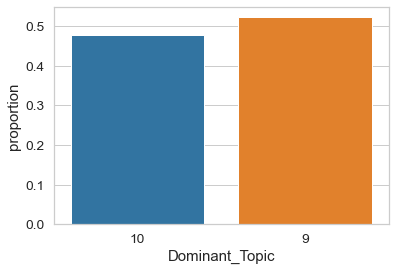

In [63]:
sns.barplot(x="Dominant_Topic", y="proportion", data= df_distr_4, order = [10, 9]);

In [64]:
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(lda_model4, corpus4, id2word4)
vis

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


PreparedData(topic_coordinates=              x    y  topics  cluster       Freq
topic                                           
1      0.176326  0.0       1        1  54.301289
0     -0.176326  0.0       2        1  45.698711, topic_info=              Term         Freq        Total Category  logprob  loglift
53          услуга  2820.000000  2820.000000  Default  30.0000  30.0000
59          деньги  2618.000000  2618.000000  Default  29.0000  29.0000
742         рублеи  2130.000000  2130.000000  Default  28.0000  28.0000
20             смс  1539.000000  1539.000000  Default  27.0000  27.0000
3         интернет  3929.000000  3929.000000  Default  26.0000  26.0000
292        вернуть  1175.000000  1175.000000  Default  25.0000  25.0000
149      отключить  1079.000000  1079.000000  Default  24.0000  24.0000
40           номер  2021.000000  2021.000000  Default  23.0000  23.0000
19        скорость  1255.000000  1255.000000  Default  22.0000  22.0000
23           тариф  1235.000000  1235.000000  Default  21.0000  21.0000
50           счета   944.000000   944.000000  Default  20.0000  20.0000
229         услуги   923.000000   923.000000  Default  19.0000  19.0000
749         баланс   826.000000   826.000000  Default  18.0000  18.0000
746           счет   837.000000   837.000000  Default  17.0000  17.0000
48         списать   756.000000   756.000000  Default  16.0000  16.0000
307        кабинет   622.000000   622.000000  Default  15.0000  15.0000
144         номера   583.000000   583.000000  Default  14.0000  14.0000
212       подписка   580.000000   580.000000  Default  13.0000  13.0000
542       работать   739.000000   739.000000  Default  12.0000  12.0000
253          моего   563.000000   563.000000  Default  11.0000  11.0000
743         сервис   560.000000   560.000000  Default  10.0000  10.0000
851          сумма   528.000000   528.000000  Default   9.0000   9.0000
42      подключать   478.000000   478.000000  Default   8.0000   8.0000
432          модем   620.000000   620.000000  Default   7.0000   7.0000
282       списание   476.000000   476.000000  Default   6.0000   6.0000
224      сообщение   454.000000   454.000000  Default   5.0000   5.0000
848        снимать   446.000000   446.000000  Default   4.0000   4.0000
17         просить   830.000000   830.000000  Default   3.0000   3.0000
329     подключить  1292.000000  1292.000000  Default   2.0000   2.0000
114         трафик   550.000000   550.000000  Default   1.0000   1.0000
19        скорость  1254.895254  1255.348291   Topic1  -4.5323   0.6103
23           тариф  1234.871132  1235.519846   Topic1  -4.5484   0.6101
542       работать   738.527584   739.009212   Topic1  -5.0625   0.6100
18        скорости   492.048256   492.507966   Topic1  -5.4685   0.6097
114         трафик   549.848126   550.386125   Topic1  -5.3575   0.6096
421             гб   487.663375   488.201306   Topic1  -5.4775   0.6095
8      ограничение   418.515292   418.989443   Topic1  -5.6304   0.6095
432          модем   619.750764   620.671629   Topic1  -5.2378   0.6091
4               кб   297.834521   298.298815   Topic1  -5.9706   0.6091
982           офис   467.779696   468.530218   Topic1  -5.5191   0.6090
603          связь   330.835900   331.390926   Topic1  -5.8655   0.6089
451            сим   518.926318   519.848672   Topic1  -5.4154   0.6088
105           сети   237.717906   238.160362   Topic1  -6.1960   0.6088
551     специалист   218.468917   218.935030   Topic1  -6.2805   0.6085
5               мб   337.105037   337.830699   Topic1  -5.8467   0.6085
3578          мбит   190.971607   191.391046   Topic1  -6.4150   0.6084
403           сеть   190.850358   191.285418   Topic1  -6.4156   0.6083
1816          кбит   196.037835   196.492774   Topic1  -6.3888   0.6083
1854           тех   240.613669   241.191267   Topic1  -6.1839   0.6082
1592         ждать   354.499610   355.399375   Topic1  -5.7964   0.6081
425         заявка   259.356184   260.018843   Topic1  -6.1089   0.6081
377         купит

### Анализ таблицы 5 <a class="anchor" id="ch7"></a>

In [65]:
data5 = df5.Text.values.tolist()
data_words5 = list(sent_to_words(data5))
print(data_words5[:1])

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[['якупила', 'сим', 'карту', 'ростове', 'на', 'дону', 'подключила', 'себе', 'интернет', 'все', 'включено', 'итоге', 'меня', 'он', 'медленыи', 'все', 'время', 'пропадает', 'становится', 'просто', 'которое', 'практически', 'не', 'грузит', 'почему']]


In [66]:
tfidf_vectorizer = TfidfVectorizer(stop_words=russian_stopwords, ngram_range=(2,3))
lda = LatentDirichletAllocation(n_components=3)
pipe = make_pipeline(tfidf_vectorizer, lda)
pipe.fit(df5['Text'])
print_top_words(lda, tfidf_vectorizer.get_feature_names(), n_top_words=10)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:383: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['оператор1'] not in stop_words.
  warnings.warn('Your stop_words may be inconsistent with '


Topic #0: каждый день, мобильный интернет, безлимитный интернет, сим карту, добрый день, дозвониться оператора, тарифный план, такая история, личный кабинет, несколько дней
Topic #1: сим карту, добрый день, мобильный интернет, интернет работает, lt span, другого оператора, помогите пожалуйста, личный кабинет, каждый день, вернуть деньги
Topic #2: личном кабинете, безлимитный интернет, добрый день, сим карту, мобильного интернета, личный кабинет, службу поддержки, сих пор, мобильный интернет, скорость интернета



In [67]:
data_ready5 = process_words(data_words5)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
C:\ProgramData\Anaconda3\lib\site-packages\spacy\util.py:275: UserWarning: [W031] Model 'ru_model' (0.2) requires spaCy v2.1 and is incompatible with the current spaCy version (2.3.5). This may lead to unexpected results or runtime errors. To resolve this, download a newer compatible model or retrain your custom model with the current spaCy version. For more details and available updates, run: python -m spacy validate
  warnings.warn(warn_msg)


In [68]:
id2word5 = corpora.Dictionary(data_ready5)

# Create Corpus: Term Document Frequency
corpus5 = [id2word5.doc2bow(text) for text in data_ready5]

# Build LDA model
lda_model5 = gensim.models.ldamodel.LdaModel(corpus=corpus5,
                                           id2word=id2word5,
                                           num_topics=3, 
                                           random_state=100,
                                           update_every=1,
                                           chunksize=10,
                                           passes=10,
                                           alpha='symmetric',
                                           iterations=100,
                                           per_word_topics=True)

pprint(lda_model5.print_topics())

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[(0,
  '0.029*"оператор" + 0.023*"интернет" + 0.010*"деньги" + 0.009*"номер" + '
  '0.009*"услуга" + 0.008*"рублеи" + 0.008*"подключить" + 0.007*"день" + '
  '0.006*"телефон" + 0.006*"сказать"'),
 (1,
  '0.027*"интернет" + 0.018*"скорость" + 0.018*"оператор" + 0.017*"работать" + '
  '0.009*"модем" + 0.007*"связь" + 0.006*"скорости" + 0.006*"проблема" + '
  '0.006*"вообще" + 0.005*"очень"'),
 (2,
  '0.040*"lt" + 0.039*"gt" + 0.038*"span" + 0.019*"em" + 0.019*"style" + '
  '0.019*"margin" + 0.010*"left" + 0.010*"right" + 0.009*"the" + 0.006*"ru"')]


In [69]:
df_topic_sents_keywords5 = format_topics_sentences(ldamodel=lda_model5, corpus=corpus5, texts=data_words5)

# Format
df_dominant_topic5 = df_topic_sents_keywords5.reset_index()
df_dominant_topic5.columns = ['Document_No', 'Dominant_Topic', 'Topic_Perc_Contrib', 'Keywords', 'Text']
df_dominant_topic5.head(20)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Document_No,Dominant_Topic,Topic_Perc_Contrib,Keywords,Text
0,0,0.0,0.4980,"оператор, интернет, деньги, номер, услуга, рублеи, подключить, день, телефон, сказать","[якупила, сим, карту, ростове, на, дону, подключила, себе, интернет, все, включено, итоге, меня, он, медленыи, все, время, пропадает, становится, просто, которое, практически, не, грузит, почему]"
1,1,0.0,0.8507,"оператор, интернет, деньги, номер, услуга, рублеи, подключить, день, телефон, сказать","[являясь, клиентом, компании, года, всегда, терпимо, относился, проблемам, связи, оператор, телефон, не, моя, абсолютная, необходимость, но, как, любои, уважающии, себя, человек, ценю, заработанные, мнои, деньги, ожидаю, этого, от, тех, кем, сотрудничаю, том, числе, от, компании, оператор, сожалению, второи, раз, сталкиваюсь, отношением, финансам, клиентов, именно, случаи, моя, супруга, тоже, клиент, оператор, года, после, очереднои, смены, телефона, обнаружила, что, за, дня, баланса, было, списано, около, рублеи, оказалось, что, предущую, смену, устарешего, тарифного, плана, оператор, без, уведомления, включил, опцию, мобильного, интернета, через, полгода, новом, телефоне, были, неправильные, настроики, если, перефразировать, ответ, оператор, сами, виноваты, ок, случаи, меня, симочныи, телефон, для, поездки, за, границу, ...]"
2,2,1.0,0.5773,"интернет, скорость, оператор, работать, модем, связь, скорости, проблема, вообще, очень","[являюсь, пользователем, несколько, лет, последнее, время, загрузка, особенно, после, часов, практически, останавливается, звоню, на, безплатныи, номер, оператор, просит, перезагрузить, комп, модем, несколько, минут, все, работает, нормально, потом, все, начинается, снова]"
3,3,0.0,0.8142,"оператор, интернет, деньги, номер, услуга, рублеи, подключить, день, телефон, сказать","[являюсь, пользователем, оператор, уже, лет, так, на, данныи, момент, подключен, тариф, смотри, при, просмотре, видео, интернете, видео, для, взрослых, при, переходе, на, мошенническии, саит, поисковика, меня, была, списана, денежная, плата, за, подключение, контенту, саита, какого, либо, согласия, подтверждения, мелкого, шрифта, которым, согласен, не, было, при, переходе, поисковика, яндекса, на, стороннии, саит, сразу, же, были, списаны, денежные, средства, при, разговора, оператором, оператор, оператор, явно, говорила, ну, мол, вы, сами, не, заметили, мелкии, шрифт, деньги, мы, вам, не, вернем, запрет, устанавливается, самостоятельно, только, сроком, на, месяца, почему, нельзя, на, все, время, по, то, му, что, мы, хотим, заработать, на, вас, бабки, со, ...]"
4,4,0.0,0.7050,"оператор, интернет, деньги, номер, услуга, рублеи, подключить, день, телефон, сказать","[являюсь, клиентом, сего, оператора, года, ранее, меня, все, более, менее, устраивало, но, недавнего, времени, мобильным, интернетом, творится, неладное, первое, обращение, было, марте, этого, года, именно, числа, до, этого, числа, мне, подключили, гб, дополнительно, на, условии, установить, их, программу, использовать, хотя, бы, один, раз, для, улучшения, качества, обслуживания, сети, моя, сеть, использовал, ее, чаще, но, после, принудительного, выключения, она, висела, рабочих, процессах, использовала, батарею, нескольких, навязчивых, смс, включите, программу, иначе, мы, отберем, вас, гб, ее, удалил, плюнув, на, эти, гб, надо, сказать, что, их, не, отключили, правда, на, начало, отчетного, периода, показывает, гб, всегда, включается, середине, месяца, точно, не, знаю, но, ...]"
5,5,0.0,0.8284,"оператор, интернет, деньги, номер, услуга, рублеи, подключить, день, телефон, сказать","[являюсь, клиентом, начала, годов, имею, несколько, номеров, все, устраивало, были, моменты, но, решались, быстро, на, этот, раз, оператор, решил, поступить, не, честно, подключился, на, тариф, включаися, пиши, за, руб, месяц, нужен, только, интернет, но, продавец, салоне, не, предупредил, что, тариф, не, подходит, для, моего, оборудования, после, долгих, выяснении, почему, перешел, декабря, года, на, тариф, онлаин, выбрал, опцию, инт

In [70]:
df_dominant_topic5['Dominant_Topic'] = df_dominant_topic5['Dominant_Topic'].astype('int64')
df_dominant_topic5.loc[df_dominant_topic5['Dominant_Topic'] == 0, 'Dominant_Topic'] = 11
df_dominant_topic5.loc[df_dominant_topic5['Dominant_Topic'] == 1, 'Dominant_Topic'] = 12
df_dominant_topic5.loc[df_dominant_topic5['Dominant_Topic'] == 2, 'Dominant_Topic'] = 13
df_dominant_topic5[['Dominant_Topic', 'Keywords']].drop_duplicates()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Dominant_Topic,Keywords
0,11,"оператор, интернет, деньги, номер, услуга, рублеи, подключить, день, телефон, сказать"
2,12,"интернет, скорость, оператор, работать, модем, связь, скорости, проблема, вообще, очень"
245,13,"lt, gt, span, em, style, margin, left, right, the, ru"


In [71]:
df_distr_5 = df_dominant_topic5['Dominant_Topic'].value_counts().reset_index().merge(  
    df_dominant_topic5['Dominant_Topic'].value_counts(1).reset_index(), on='index').rename(columns=({
    'index': 'Dominant_Topic',     
    'Dominant_Topic_x': 'count',
    'Dominant_Topic_y': 'proportion'
})).merge(df_dominant_topic5[['Dominant_Topic', 'Keywords']].drop_duplicates(), 
         on = 'Dominant_Topic').sort_values('proportion', ascending=False).reset_index(drop=True)
df_distr_5

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Dominant_Topic,count,proportion,Keywords
0,11,1113,0.692595,"оператор, интернет, деньги, номер, услуга, рублеи, подключить, день, телефон, сказать"
1,12,482,0.299938,"интернет, скорость, оператор, работать, модем, связь, скорости, проблема, вообще, очень"
2,13,12,0.007467,"lt, gt, span, em, style, margin, left, right, the, ru"


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


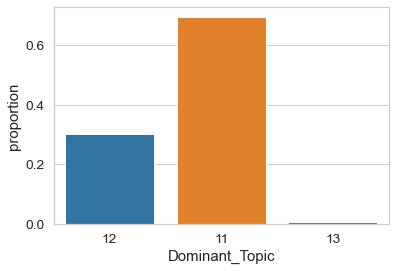

In [72]:
sns.barplot(x="Dominant_Topic", y="proportion", data= df_distr_5, order = [12, 11, 13]);

In [73]:
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(lda_model5, corpus5, id2word5)
vis

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
0      0.220377  0.105235       1        1  69.782930
1      0.016153 -0.190288       2        1  25.344821
2     -0.236530  0.085053       3        1   4.872249, topic_info=                Term        Freq       Total Category  logprob  loglift
1110        скорость  460.000000  460.000000  Default  30.0000  30.0000
7719              lt  192.000000  192.000000  Default  29.0000  29.0000
3851              gt  187.000000  187.000000  Default  28.0000  28.0000
7723            span  184.000000  184.000000  Default  27.0000  27.0000
178         работать  566.000000  566.000000  Default  26.0000  26.0000
...              ...         ...         ...      ...      ...      ...
12262            use    7.316328    8.199431   Topic3  -6.4867   2.9077
12233       solution    7.316328    8.199431   Topic3  -6.4867   2.9077
11547             it   16.920439   20.904460   Topic3  -5.6482   2.8102
6692              ms   13.446624   18.928890   Topic3  -5.8780   2.6797
11525  ненадлежащего    9.391580   22.208935   Topic3  -6.2370   2.1609

[165 rows x 6 columns], token_table=       Topic      Freq   Term
term                         
12121      2  0.034870    and
12121      3  0.941479    and
12132      2  0.121960    but
12132      3  0.853718    but
7717       3  0.991846     em
...      ...       ...    ...
535        1  0.484440  центр
535        2  0.516311  центр
1017       3  0.896677    чек
3837       1  0.035907  штука
3837       2  0.969479  штука

[194 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[1, 2, 3])

### Анализ таблицы 6 <a class="anchor" id="ch8"></a>

In [74]:
data6 = df6.Text.values.tolist()
data_words6 = list(sent_to_words(data6))
print(data_words6[:1])

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[['являюсь', 'пользователем', 'оператор', 'больше', 'лет', 'недавно', 'приехала', 'родителям', 'оса', 'пермского', 'края', 'интернет', 'просто', 'отвратительныи', 'значок', 'на', 'деле', 'не', 'загружает', 'даже', 'сообщения', 'социальных', 'сетях', 'обращение', 'контактныи', 'центр', 'никак', 'делу', 'не', 'помогло', 'сказали', 'что', 'утру', 'связь', 'интернет', 'станут', 'лучше', 'однако', 'сегодня', 'день', 'после', 'обращения', 'данныи', 'саит', 'загружался', 'почти', 'минуту', 'не', 'говоря', 'уже', 'фильмах', 'музыке', 'ладно', 'бы', 'если', 'этои', 'геоточке', 'всегда', 'так', 'было', 'но', 'ведь', 'раньше', 'все', 'было', 'прекрасно', 'ставлю', 'единицу', 'за', 'отвратныи', 'интернет']]


In [75]:
tfidf_vectorizer = TfidfVectorizer(stop_words=russian_stopwords, ngram_range=(2,3))
lda = LatentDirichletAllocation(n_components=2)
pipe = make_pipeline(tfidf_vectorizer, lda)
pipe.fit(df6['Text'])
print_top_words(lda, tfidf_vectorizer.get_feature_names(), n_top_words=7)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:383: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['оператор1'] not in stop_words.
  warnings.warn('Your stop_words may be inconsistent with '


Topic #0: сим карту, личном кабинете, добрый день, оператор3 коннект, компании оператор3, другого оператора, сим карты
Topic #1: добрый день, вернуть деньги, мобильный интернет, личном кабинете, оператор3 коннект, другого оператора, lt span



In [76]:
data_ready6 = process_words(data_words6)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
C:\ProgramData\Anaconda3\lib\site-packages\spacy\util.py:275: UserWarning: [W031] Model 'ru_model' (0.2) requires spaCy v2.1 and is incompatible with the current spaCy version (2.3.5). This may lead to unexpected results or runtime errors. To resolve this, download a newer compatible model or retrain your custom model with the current spaCy version. For more details and available updates, run: python -m spacy validate
  warnings.warn(warn_msg)


In [77]:
id2word6 = corpora.Dictionary(data_ready6)

# Create Corpus: Term Document Frequency
corpus6 = [id2word6.doc2bow(text) for text in data_ready6]

# Build LDA model
lda_model6 = gensim.models.ldamodel.LdaModel(corpus=corpus6,
                                           id2word=id2word6,
                                           num_topics=2, 
                                           random_state=100,
                                           update_every=1,
                                           chunksize=10,
                                           passes=10,
                                           alpha='symmetric',
                                           iterations=100,
                                           per_word_topics=True)

pprint(lda_model6.print_topics())

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[(0,
  '0.019*"оператор" + 0.018*"интернет" + 0.011*"модем" + 0.010*"скорость" + '
  '0.010*"работать" + 0.008*"связь" + 0.006*"телефон" + 0.005*"связи" + '
  '0.005*"проблема" + 0.004*"рассрочка"'),
 (1,
  '0.026*"оператор" + 0.014*"интернет" + 0.009*"услуга" + 0.008*"номер" + '
  '0.008*"телефон" + 0.008*"тариф" + 0.007*"деньги" + 0.006*"день" + '
  '0.006*"рублеи" + 0.006*"месяц"')]


In [78]:
df_topic_sents_keywords6 = format_topics_sentences(ldamodel=lda_model6, corpus=corpus6, texts=data_words6)

# Format
df_dominant_topic6 = df_topic_sents_keywords6.reset_index()
df_dominant_topic6.columns = ['Document_No', 'Dominant_Topic', 'Topic_Perc_Contrib', 'Keywords', 'Text']
df_dominant_topic6.head(20)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Document_No,Dominant_Topic,Topic_Perc_Contrib,Keywords,Text
0,0,1.0,0.5496,"оператор, интернет, услуга, номер, телефон, тариф, деньги, день, рублеи, месяц","[являюсь, пользователем, оператор, больше, лет, недавно, приехала, родителям, оса, пермского, края, интернет, просто, отвратительныи, значок, на, деле, не, загружает, даже, сообщения, социальных, сетях, обращение, контактныи, центр, никак, делу, не, помогло, сказали, что, утру, связь, интернет, станут, лучше, однако, сегодня, день, после, обращения, данныи, саит, загружался, почти, минуту, не, говоря, уже, фильмах, музыке, ладно, бы, если, этои, геоточке, всегда, так, было, но, ведь, раньше, все, было, прекрасно, ставлю, единицу, за, отвратныи, интернет]"
1,1,0.0,0.6181,"оператор, интернет, модем, скорость, работать, связь, телефон, связи, проблема, рассрочка","[являюсь, пользователем, корпоративного, тарифа, оператор, течении, последних, двух, лет, стал, достаточно, часто, пользоваться, столкнулся, проблемои, при, включенном, начинается, деградация, связи, вплоть, да, полного, пропадания, грешил, на, телефон, но, проблема, сохранялась, на, nokia, на, lg, на, hts, incredible, более, того, подобная, проблема, возникает, не, только, меня, но, коллег, друзеи, которые, так, же, пользуются, оператор, от, локации, так, же, не, зависит]"
2,2,1.0,0.8987,"оператор, интернет, услуга, номер, телефон, тариф, деньги, день, рублеи, месяц","[являюсь, корпоративным, клиентом, оператор, иногда, приходится, по, работе, посещать, другие, регионы, чтобы, не, платить, за, роуминг, подключал, дополнительную, услугу, везде, как, дома, февраля, сидя, аэропорту, перед, вылетом, москву, решил, подключить, услугу, везде, как, дома, приложении, оператор, ее, не, нашел, пытался, позвонить, оператору, но, так, не, дозвонился, потом, случаино, увидел, на, саите, оператор, новость, что, сентября, года, роуминг, отменен, на, всех, тарифах, спокоино, улетел, москву, ничего, не, подключая, вот, февраля, все, таки, решил, посмотреть, детализацию, расходов, оказалось, что, за, сутки, меня, сняли, почти, рублеи, вот, такая, вот, отмена, роуминга, когда, мои, коллега, ответственныи, за, мобильную, связь, позвонил, оператор, то, ему, ответили, ...]"
3,3,0.0,0.6782,"оператор, интернет, модем, скорость, работать, связь, телефон, связи, проблема, рассрочка","[являюсь, клиентом, оператор, понадобился, интернет, для, дачи, городе, руза, заехал, офис, оператор, приобрел, комплект, оператор, конект, причем, спрашивал, совместимости, операционнои, системои, mac, os, заверили, что, проблем, нет, все, совместимо, неделю, работало, все, нормально, если, не, считать, постоянным, отваливанеем, модема, вместо, заявленных, через, неделю, скорость, упала, до, полного, нуля, кб, программка, конекта, стала, зависать, системе, обратился, офис, оператор, рузе, там, сказали, полохая, связь, это, плохая, погода, ха, ха, правда, конкурентов, все, нормально, погода, них, хорошая, пытался, обратиться, по, телефону, поддержку, по, поводу, зависания, программки, запуска, модема, там, сказали, что, это, проблемы, мака, правда, запускал, модем, при, помощи, самои, операционнои, системы, вот, ...]"
4,4,1.0,0.9919,"оператор, интернет, услуга, номер, телефон, тариф, деньги, день, рублеи, месяц","[являюсь, клиентом, оператор, более, лет, до, недавнего, времени, все, устраивало, относительно, других, операторов, мая, года, оператор, решило, изменить, тариф, мои, безлимитище, перевести, меня, без, моего, ведома, стоило, руб, гб, смс, минут, стало, руб, за, гб, мин, смс, оператор, колл, центре, сказала, что, меня, стоит, запрет, от, смс, рассылок, оператор, поэтому, уведомление, не, пришло, скорее, всего, отказывался, от, спама, рекламных, предложении, но, не, от, смены, тарифа, или, деиствии, которые, связаны, со, мнои, моим, номером, допустим, не, прав, после, разговора, оператором, по, ее, рекомендации, решил, разрешить, оператор, отправлять, мне, смс, посредством, но, итоге, получил, операция, запрещена, скриншот, прикрепляю, так, как, меня, 

In [79]:
df_dominant_topic6['Dominant_Topic'] = df_dominant_topic6['Dominant_Topic'].astype('int64')
df_dominant_topic6.loc[df_dominant_topic6['Dominant_Topic'] == 0, 'Dominant_Topic'] = 14
df_dominant_topic6.loc[df_dominant_topic6['Dominant_Topic'] == 1, 'Dominant_Topic'] = 15
df_dominant_topic6[['Dominant_Topic', 'Keywords']].drop_duplicates()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Dominant_Topic,Keywords
0,15,"оператор, интернет, услуга, номер, телефон, тариф, деньги, день, рублеи, месяц"
1,14,"оператор, интернет, модем, скорость, работать, связь, телефон, связи, проблема, рассрочка"


In [80]:
df_distr_6 = df_dominant_topic6['Dominant_Topic'].value_counts().reset_index().merge(  
    df_dominant_topic6['Dominant_Topic'].value_counts(1).reset_index(), on='index').rename(columns=({
    'index': 'Dominant_Topic',     
    'Dominant_Topic_x': 'count',
    'Dominant_Topic_y': 'proportion'
})).merge(df_dominant_topic6[['Dominant_Topic', 'Keywords']].drop_duplicates(), 
         on = 'Dominant_Topic').sort_values('proportion', ascending=False).reset_index(drop=True)
df_distr_6

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Dominant_Topic,count,proportion,Keywords
0,15,1467,0.748088,"оператор, интернет, услуга, номер, телефон, тариф, деньги, день, рублеи, месяц"
1,14,494,0.251912,"оператор, интернет, модем, скорость, работать, связь, телефон, связи, проблема, рассрочка"


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


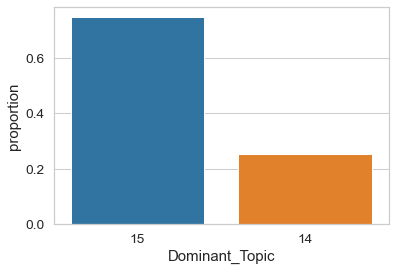

In [81]:
sns.barplot(x="Dominant_Topic", y="proportion", data= df_distr_6, order = [15, 14]);

In [82]:
import pyLDAvis.gensim
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(lda_model6, corpus6, id2word6)
vis

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


PreparedData(topic_coordinates=              x    y  topics  cluster       Freq
topic                                           
1      0.151976  0.0       1        1  76.658524
0     -0.151976  0.0       2        1  23.341476, topic_info=            Term         Freq        Total Category  logprob  loglift
157        модем   424.000000   424.000000  Default  30.0000  30.0000
9       интернет  2403.000000  2403.000000  Default  29.0000  29.0000
189     скорость   367.000000   367.000000  Default  28.0000  28.0000
182     работать   520.000000   520.000000  Default  27.0000  27.0000
33         связь   331.000000   331.000000  Default  26.0000  26.0000
...          ...          ...          ...      ...      ...      ...
40         стать   100.326956   235.286699   Topic2  -5.9216   0.6026
276        стоит    97.932338   200.413513   Topic2  -5.9457   0.7388
670       купить    95.184410   181.587526   Topic2  -5.9742   0.8090
5880  оформления    95.616467   232.966092   Topic2  -5.9697   0.5644
522        месяц    98.930082   775.783380   Topic2  -5.9356  -0.6045

[146 rows x 6 columns], token_table=      Topic      Freq    Term
term                         
2708      2  0.972236    edge
1429      1  0.019045     lte
1429      2  0.990348     lte
2240      1  0.011615     vip
2240      2  0.987276     vip
...     ...       ...     ...
480       2  0.001838  услуги
2421      1  0.014044    хуже
2421      2  0.997135    хуже
43        1  0.947388   центр
43        2  0.053306   центр

[214 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[2, 1])

### Вывод <a class="anchor" id="ch9"></a>

In [83]:
df_final_distr = pd.concat([df_distr_1, df_distr_2, df_distr_3, df_distr_4, df_distr_5, df_distr_6])
df_final_distr

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Dominant_Topic,count,proportion,Keywords
0,2,4436,0.592652,"услуга, деньги, рублеи, услуги, номер, смс, вернуть, подключить, отключить, счета"
1,1,2786,0.372211,"оператор, тариф, номер, офис, ответ, связи, сказать, телефон, мочь, вопрос"
2,0,263,0.035137,"связь, работать, телефон, проблема, дозвониться, интернет, сеть, сети, невозможно, связи"
0,5,1957,0.717638,"оператор, услуга, деньги, смс, номер, рублеи, баланс, телефон, день, связи"
1,4,431,0.158049,"тариф, оператор, интернет, план, связь, минут, пакет, трафик, оператора, связи"
2,6,339,0.124312,"оператор, номер, салон, lt, gt, офис, днеи, заявка, span, связи"
0,7,1275,0.578494,"оператор, номер, салон, телефон, связи, заявление, офис, обратиться, сказать, сим"
1,8,929,0.421506,"услуга, оператор, тариф, деньги, рублеи, вернуть, услуги, смс, баланс, номер"
0,9,2680,0.522723,"услуга, деньги, рублеи, номер, смс, оператор, день, вернуть, отключить, подключить"
1,10,2447,0.477277,"интернет, оператор, скорость, тариф, работать, месяц, день, сказать, модем, проблема"


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


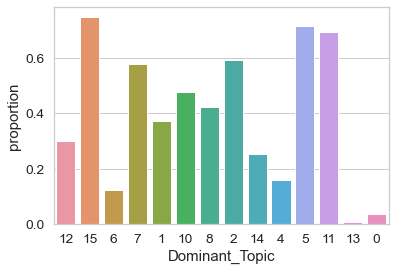

In [84]:
sns.barplot(x="Dominant_Topic", y="proportion", data= df_final_distr, order = [12, 15, 6,7,  1, 10, 8, 2, 14, 4, 5, 11, 13, 0]);

По данному графику можно сделать вывод, что самая популярная тема это тема под номером 12. На нее поступает больше всего жалоб. 

In [85]:
df_final_distr ['Theme'] = ['Автоматически подключили услугу без оповещения и стали сниматься деньги', 'Невозможность дозвониться до оператора', 'Непроивзольная смена трафика', 'Предоставление оператором неверной информации по поводу дополнительных опций', 'Просьба перейти на другой тариф', 'У граждан за пределами территории их места проживания связь очень плохая и нарушенное соединение', 'Проблема с сим-картой', 'Просьба вернуть деньги, приходит реклама, которую не подключали', 'Просьба вернуть деньги за внезапное увелечинеие платы за определенные функции тарифа', 'Ограничение по скорости на тарифах, до оплаты была мб, после оплаты стала кб', 'Плохое соединение', 'Просьба вернуть деньги за преждевременное снятие денег с баланса', 'При разьездах заграницу связь отсуствует, интернет отключается', 'Медленный интернет, просьба вернуть деньги', 'Отлюкчить дополнительную услугу по смс']
df_final_distr

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Dominant_Topic,count,proportion,Keywords,Theme
0,2,4436,0.592652,"услуга, деньги, рублеи, услуги, номер, смс, вернуть, подключить, отключить, счета",Автоматически подключили услугу без оповещения и стали сниматься деньги
1,1,2786,0.372211,"оператор, тариф, номер, офис, ответ, связи, сказать, телефон, мочь, вопрос",Невозможность дозвониться до оператора
2,0,263,0.035137,"связь, работать, телефон, проблема, дозвониться, интернет, сеть, сети, невозможно, связи",Непроивзольная смена трафика
0,5,1957,0.717638,"оператор, услуга, деньги, смс, номер, рублеи, баланс, телефон, день, связи",Предоставление оператором неверной информации по поводу дополнительных опций
1,4,431,0.158049,"тариф, оператор, интернет, план, связь, минут, пакет, трафик, оператора, связи",Просьба перейти на другой тариф
2,6,339,0.124312,"оператор, номер, салон, lt, gt, офис, днеи, заявка, span, связи",У граждан за пределами территории их места проживания связь очень плохая и нарушенное соединение
0,7,1275,0.578494,"оператор, номер, салон, телефон, связи, заявление, офис, обратиться, сказать, сим",Проблема с сим-картой
1,8,929,0.421506,"услуга, оператор, тариф, деньги, рублеи, вернуть, услуги, смс, баланс, номер","Просьба вернуть деньги, приходит реклама, которую не подключали"
0,9,2680,0.522723,"услуга, деньги, рублеи, номер, смс, оператор, день, вернуть, отключить, подключить",Просьба вернуть деньги за внезапное увелечинеие платы за определенные функции тарифа
1,10,2447,0.477277,"интернет, оператор, скорость, тариф, работать, месяц, день, сказать, модем, проблема","Ограничение по скорости на тарифах, до оплаты была мб, после оплаты стала кб"


Какие преимущества и недостатки у метода LDA? Говоря о недостатках, нужно вручную настраивать параметры такие, как количество тем, распределение весов тем, распределение весов слов в каждой теме и тд Говоря о преимуществах, можно уверенно сказачть, что результаты интерпретируемые и данный алгоритм достаточно эффективный. 

In [86]:
df_final_topic = pd.concat([df_dominant_topic1, df_dominant_topic2, df_dominant_topic3, df_dominant_topic4, df_dominant_topic5, df_dominant_topic6])
df_final_topic['Dominant_Topic'] = df_final_topic['Dominant_Topic'].astype('int64')
df_final_topic

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Document_No,Dominant_Topic,Topic_Perc_Contrib,Keywords,Text
0,0,1,0.7591,"оператор, тариф, номер, офис, ответ, связи, сказать, телефон, мочь, вопрос","[являюсь, клиентом, оператор, более, лет, за, это, время, случались, мелкие, недоразумения, которые, быстро, адекватно, решались, но, эта, ситуация, сама, по, себе, не, представляющая, особои, важности, меня, удивила, поставила, тупик, на, мои, телефон, поступило, sms, сообщение, спам, от, организации, которои, не, давал, свои, номер, телефона, согласия, на, получение, рекламы, переслал, данное, сообщение, указанием, отправителя, даты, времени, получения, по, номеру, для, борьбы, со, спамом, также, была, сформирована, отправлена, жалоба, фас, рф, через, некоторое, время, получил, следующии, ответ, от, оператор, уважаемыи, клиент, спасибо, за, ваше, обращение, факт, поступления, указанного, вами, сообщения, не, зафиксирован, просим, предоставить, новые, примеры, благодарим, за, сотрудничество, заботои, вас, ваш, ...]"
1,1,1,0.5975,"оператор, тариф, номер, офис, ответ, связи, сказать, телефон, мочь, вопрос","[являюсь, счастливым, обладателем, тарифа, все, для, семьи, за, сущие, копеики, получаю, связь, интернет, телевидение, все, бы, ничего, но, трафик, из, пакета, мобильного, интернета, его, меня, гб, расходуется, все, быстрее, быстрее, заказав, детализацию, понял, что, основная, доля, списании, моего, счета, идет, по, сессиям, мб, иногда, такими, пакетами, расходуется, до, гб, день, что, само, по, себе, подозрительно, потому, что, обычно, телефон, качает, не, ровные, цифры, объема, пакетов, они, редко, повторяются, также, подозрительно, что, когда, гб, иссякают, скачка, пакетов, тоже, сходит, на, нет, вместо, лошадиных, закачек, по, мб, остаются, только, редкие, по, мб, хотя, интернет, проваидер, предоставляет, без, лимита, но, на, небольшои, скорости, ...]"
2,2,1,0.7515,"оператор, тариф, номер, офис, ответ, связи, сказать, телефон, мочь, вопрос","[являюсь, пользователем, услуг, сотовои, связи, компании, вымпелком, по, необходимости, работе, были, приобретены, сим, карты, какое, то, время, пользовались, потом, один, прекрасныи, день, узнал, что, мои, сим, карты, заблокированы, но, это, полбеды, на, всех, номерах, был, положительныи, баланс, итоге, сумма, более, рублеи, на, моих, лицевых, счетах, исчезли, естественно, доступ, личныи, кабинет, заблокирован, по, номеру, было, написано, заявление, мини, офисе, но, ответа, так, не, было, по, номерам, был, запрос, через, саит, но, после, вопроса, как, вернуть, деньги, ответов, не, было]"
3,3,1,0.7093,"оператор, тариф, номер, офис, ответ, связи, сказать, телефон, мочь, вопрос","[являюсь, пользователем, сотового, оператора, оператор, уже, лет, но, уже, просто, нет, сил, терпеть, некачественное, предоставление, услуг, за, которое, так, платишь, много, средств, так, они, еще, подключают, платные, услуги, без, оповещения, ранее, они, улаживали, такие, нюансы, тех, кто, вовремя, замечал, теперь, при, общении, сотрудником, которым, не, так, просто, связаться, теперь, обвинения, идут, нашу, сторону, что, это, мы, подключаем, сами, или, это, саиты, подключают, но, оператор, этому, отношения, не, имеет, по, версии, сотрудников, наверно, нужно, сидеть, онлаин, личном, кабинете, следить, чтобы, ничего, не, подключилось, хотя, думаю, что, таком, случае, вины, абонента, будет, еще, больше, как, хорошо, что, теперь, можно, менять, оператора, без, ...]"
4,4,1,0.5903,"оператор, тариф, номер, офис, ответ, связи, сказать, телефон, мочь, вопрос","[являюсь, пользователем, оператор, лет, последние, лет, номером, практически, не, пользуюсь, на, работе, выдали, корпоративныи, номер, год, назад, заметил, что, стали, пропадать, деньги, со, счета, оказалось, молча, подключили, какую, то, услугу, спокоино, списывали, коп, день, мелочь, неприятно, отключил, на, саите, сеичас, смотрю, баланса, опять, пропало, лишним, рублеи, захожу, на, саит, посмотреть, детализацию, вижу, что, оператор, молча, перевел, мои, старыи, тариф, хочу, сказать, постоплатного, на, предоп

In [87]:
num = int(input('Введите номер темы, которая Вам интересна: '))

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Введите номер темы, которая Вам интересна: 0


In [88]:
display(df_final_topic[df_final_topic['Dominant_Topic'] == num][['Dominant_Topic', 'Text']])

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Dominant_Topic,Text
6,0,"[являюсь, многолетним, пользователем, сети, оператор, всегда, почти, все, устраивало, но, что, вдруг, вас, ребята, случилось, городе, между, абонентами, еще, разговаривать, можно, но, вот, что, дмитровском, раионе, что, орехово, зуевском, серпуховском, связь, постоянно, пропадает, все, квакает, прерывается, теперь, для, полноценного, разговора, надо, по, старинке, на, березу, залезать, думал, это, временно, но, уже, третии, месяц, такая, ерундистика, можно, что, то, исправить, то, уж, больно, не, охотно, на, другого, оператора, перепрыгивать]"
44,0,"[являюсь, абонентом, оператор, года, до, настоящего, времени, связь, более, менее, устраивала, но, со, сменои, работы, приходится, много, ездить, по, командировкам, регионы, если, крупных, городах, связь, еще, приемлемая, хотя, вечернее, время, интернет, плохо, загружается, канал, забит, скорости, практически, нету, основном, но, чаще, то, небольших, городках, связь, просто, кошмар, часто, нет, сигнала, постоянно, прерывается, приходится, веке, по, городу, перемещаться, искать, устоичивую, связь, вышкои, интернете, открытых, источниках, решил, посмотреть, как, оператор, развивает, свою, сеть, был, неприятно, удивлен, когда, узнал, что, из, крупных, операторов, связи, россии, оператор, занимает, последнее, место, по, количеству, базовых, станции, отставая, от, лидера, на, базовых, станции, имея, своем, распоряжении, всего, ...]"
58,0,"[являюсь, абонементом, оператор, уже, давно, как, вся, моя, семья, которую, посадила, на, этого, оператора, последнии, год, стала, ужасно, работать, связь, интернет, вообще, часто, пропадает, но, что, больше, всего, меня, удивило, сегодня, на, сколько, не, ценятся, абоненты, позвонили, город, тирасполь, при, чем, уже, не, первыи, раз, звоним, связи, не, было, ни, гудков, ни, сброса, ничего, но, смотрю, деньги, списали, обратилась, оператор, сказали, что, деньги, не, вернут, так, как, соединение, состоялось, итоге, деньги, списали, еще, моральныи, ущерб, до, родителеи, не, дозвонились, тем, кто, впервые, выбирает, оператора, не, советую, работает, каждым, годом, все, хуже, хуже]"
76,0,"[являюсь, клиентом, компании, длительное, время, некоторое, время, спустя, стал, корпоративным, клиентом, но, течение, последних, двух, лет, меня, стали, появляться, проблемы, со, связью, не, устанавливается, соединение, прерывается, середине, разговора, искажает, голос, меня, собеседника, сначала, проблема, была, по, одному, адресу, несколько, раз, звонил, hi, lite, club, мне, сказали, что, меняют, оборудование, переходят, на, новыи, уровень, обслуживания, поэтому, проблемы, со, связью, но, проблемы, со, связью, не, исчезли, теперь, другом, раионе, со, связью, похожая, ситуация, только, даже, если, сидеть, рядом, окном, не, факт, что, связь, будет, вообще, по, городу, особо, не, наблюдается, такая, проблема, со, связью, она, есть, но, проявляется, не, так, часто, но, ...]"
218,0,"[нахожусь, грозном, после, сегодняшних, боевых, деиствии, мои, телефон, перестал, ловить, сеть, чем, это, связанно, как, долго, это, продлится, модель, телефона, iphone, номер]"
...,...,...
7386,0,"[плохо, работает, нет, связи, на, западном, малиновского, таганрогскаято, появляется, то, пропадает]"
7421,0,"[постоянно, подключаются, какие, то, платные, услуги, надо, тратить, время, чтобы, отключить, мобильныи, интернет, становиться, все, хуже, хуже, меня, тариф, не, безлимит, оплачены, гигабаиты, но, скорость, качество, связи, ужасное, ничего, не, исправляется, только, хуже, меня, оператор, уже, более, лет, но, видимо, скоро, его, поменяю]"
7481,0,"[прихожу, выводу, что, андроид, это, зло, вот, меня, бада, закрытая, операционка, но, это, полноценныи, смартфон, он, раз, году, обновляется, вернее, уже, не, обновляется, если, даммы, господа, никуда, не, жать, не, ходить, по, малоизвестным, саитам, телефон, просто, лежит, то, никуда, без, вашего, ведома, он, не, подпишется, если, всем, аулом, беспорядочно, жать, кнопки, на, короткие, номера, контента, долг, прочеи, ерунды, т

In [ ]:
# Save the df
# Чтобы Вам не прогонять весь код, чтобы увидеть таблицу df_final, Вы можете запустить эту ячейку. df_final_topic.to_csv('df_final_topic.csv', index=False)

# Final cell to run
import pandas as pd 

df = pd.read_csv('df_final_topic.csv')
topic_number = int(input('Please, specify the Topic number (0-15): '))
display(df_final_topic[df_final_topic['Dominant_Topic'] == topic_number][['Dominant_Topic', 'Text']])